### Init

Importe le module `cli` qui contient toute les commandes de l'API et configure l'API pour qu'elle se connecte au serveur.

In [1]:
import liv4dcli as cli
from pandas import DataFrame
from commands.utils import paste_int_list
cli.config.url = "http://liv4dfs.gi.polymtl.ca"

Créé des alias vers les ensembles de biomarqueusr et vers les ID d'utilisateur des cliniciens.

In [5]:
bright = "Exudates,Cotton Wool Spots,Drusen,Uncertain - Bright"
red = "Microaneurysms,Hemorrhages,Sub-retinal hemorrhage,Pre-retinal hemorrhage,Neovascularization,Uncertain - Red"
disk = "Disk,Cup,Macula"
vessel = "Vessels - Uncertain"
lesions = "Exudates,Cotton Wool Spots,Drusen,Uncertain - Bright,Microaneurysms,Hemorrhages,Sub-retinal hemorrhage,Pre-retinal hemorrhage,Neovascularization,Uncertain - Red"

boucher = "84be2a52-5491-4d67-ad75-1704964eeb51"
brent = "4207335d-4aea-4975-8ab0-3d46f8259e6f"
desroches = "d8fae448-3e1f-41cc-93cd-bef2df151d47"
duval = "02758e79-f1e1-4989-8e57-5658672a2b12"
hammamji = "7b1dc155-f885-4ad8-9582-b5db27196c66"
kalevar = "ed2f771f-fd43-4f0f-98f3-c42edfb5f3b4"
qian = "9dbc7fbd-66a9-4990-b53f-291f806f6672"
wong = "de7b71eb-87b0-4dce-84fe-373e86dc7eb8"


clinicians = [boucher, brent, desroches, duval, hammamji, kalevar, qian, wong]

clement = "e3252de6-e128-4553-91b7-ed392529cc7b"
gabriel = "b45c99c9-b10e-4cd9-96d7-4060a889184b"
philippe = "9b869c98-d334-426a-a824-7ca80c50e344"
demo = "a8d42b15-4d1e-4a95-a95e-852b9712fc71"

**Taches**
 - utilisateur
 - image
 - Complétée
 - Active (Visible)
 - Type de taches (toujours 1)
 
**Révisions (données annotations)**
 - Image
 - Utilisateur (une seule révision par utilisateur et par image)
 - Commentaire
     - Liste biomarqueurs modifiables
     - Diagnostique ou annotation de biomarqueurs (exclusif)
     - Timer
     - Commentaire affiché dans le champ commentaire
 - SVG (biomarqueurs en format xml puis png)
     
 

### Utilisateurs

Lister les utilisateurs:

In [21]:
users = cli.user.list_user()
DataFrame.from_dict(users)

,id,name,email,role
0,597c679a-fd6e-4c87-833d-26d1d9232a9a,prod,prod@prod.com,admin
1,a8d42b15-4d1e-4a95-a95e-852b9712fc71,demo,demo@demo.ca,clinician
2,e3252de6-e128-4553-91b7-ed392529cc7b,clement.playout,clement.playout@polymtl.ca,admin
3,de6f4028-bc85-4bf1-9a87-3e9467cf4383,farida.cheriet,farida.cheriet@polymtl.ca,admin
4,9b869c98-d334-426a-a824-7ca80c50e344,philippe.debanne,philippe.debanne@polymtl.ca,admin
5,ed2f771f-fd43-4f0f-98f3-c42edfb5f3b4,ananda.kalevar,ananda.kalevar@usherbrooke.ca,clinician
6,84be2a52-5491-4d67-ad75-1704964eeb51,mariecarole,mariecarole@gmail.com,clinician
7,de7b71eb-87b0-4dce-84fe-373e86dc7eb8,wongd,wongd@smh.ca,clinician
8,4207335d-4aea-4975-8ab0-3d46f8259e6f,mhbrent,mhbrent@rogers.com,clinician
9,02758e79-f1e1-4989-8e57-5658672a2b12,renaud.duval,renaud.duval@gmail.com,clinician


Ajouter un clinicien.

In [23]:
#cli.user.create(name="name",email="email",password="password", role='clinician')

Modifier un mot de passe.

In [7]:
#cli.user.update(gabriel, password='1234admin')

### Images

Liste des images par index: https://docs.google.com/spreadsheets/d/1AvLe63q63mK4RWOqEvJaUWy0_JMGgu07koFHr9chbQU/edit?usp=sharing.

Coller une liste d'index depuis le presse papier dans python:

In [24]:
imgs = cli.utils.paste_int_list()
print(len(imgs),'|',imgs)

9 | [312, 315, 318, 320, 324, 331, 333, 341, 347]


### Taches

Lister les taches d'un utilisateur:

In [11]:
tasks = cli.task.list_task(boucher)
DataFrame.from_dict(tasks)

,id,image,user,active,completed
0,3876,"{'id': 6, 'path': 'storage/20051214_57940_0100...","{'id': '84be2a52-5491-4d67-ad75-1704964eeb51',...",True,False
1,3877,"{'id': 11, 'path': 'storage/20060410_40146_020...","{'id': '84be2a52-5491-4d67-ad75-1704964eeb51',...",True,False
2,3878,"{'id': 17, 'path': 'storage/20051202_51677_040...","{'id': '84be2a52-5491-4d67-ad75-1704964eeb51',...",True,False
3,3880,"{'id': 20, 'path': 'storage/20060412_61501_020...","{'id': '84be2a52-5491-4d67-ad75-1704964eeb51',...",True,False
4,3881,"{'id': 23, 'path': 'storage/20051021_40074_010...","{'id': '84be2a52-5491-4d67-ad75-1704964eeb51',...",True,False
5,3882,"{'id': 26, 'path': 'storage/20051020_55346_010...","{'id': '84be2a52-5491-4d67-ad75-1704964eeb51',...",True,False
6,3883,"{'id': 36, 'path': 'storage/20051202_37349_040...","{'id': '84be2a52-5491-4d67-ad75-1704964eeb51',...",True,False
7,3884,"{'id': 37, 'path': 'storage/20051202_51655_040...","{'id': '84be2a52-5491-4d67-ad75-1704964eeb51',...",True,False
8,3885,"{'id': 38, 'path': 'storage/20051208_39498_040...","{'id': '84be2a52-5491-4d67-ad75-1704964eeb51',...",True,False
9,3886,"{'id': 43, 'path': 'storage/20051202_51488_040...","{'id': '84be2a52-5491-4d67-ad75-1704964eeb51',...",True,False


Ajoute une tache à un utilisateur:

In [56]:
# image_id: L'identifiant de l'image ou une liste d'identifiant.
# user_id: L'identifiant de l'utilisateur
# limit_biomarkers: liste (ou string séparé par des virgules) des biomarqueurs modifiables
# active: Affiche la tache dans la liste des taches de l'utilisateur
# completed: Marque la tache comme complétée dans la liste des taches de l'utilisateur
# diagnostic: Remplace l'outils d'annotation de biomarqueurs par l'annotation du diagnostic (DR, MA)
# comment: Précise un commentaire 
# merge: Si une tache existe, elle est merge avec la nouvelle.

cli.task.create(10, demo)
cli.task.create([11,12], demo, limit_biomarkers=red)
cli.task.create(13, demo, diagnostic=True, comment="Faire le diagnostic")

Task 4017 has been created.
A revision already existed for image 11 and user a8d42b15-4d1e-4a95-a95e-852b9712fc71. 	
Are you sure you want to assign a new task?[y/N]N
Cancelling...
Task 4018 has been created.


True

Supprimer une tache d'un utilisateur:

Supprimer toutes les taches d'un utilisateur:

In [50]:
cli.task.delete_all_from_user(demo)

7 tasks are linked to the user demo. Are you sure you want to delete them? (Revision will not be deleted but comments will...)[y/N]y
Task 1026 Removed!  (image #190, user: demo)
Task 4007 Removed!  (image #10, user: demo)
Task 4008 Removed!  (image #11, user: demo)
Task 4009 Removed!  (image #12, user: demo)
Task 4010 Removed!  (image #10, user: demo)
Task 4011 Removed!  (image #11, user: demo)
Task 4012 Removed!  (image #12, user: demo)


### Revision

Lire une revision

ID 1997
Commentaire [time=00:07] 
SVG <svg xmlns="http://www.w3.org/2000/svg" xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd" xmlns:xlink="http://www.w3.org/1999/xlink" sodipodi:docname="fullAnnotations.svg" style="visibility: visible;"><g id="Lesions" style="visibility: visible;"><g id="Bright" style="visibility: visible;"><image color="#7a9d32" id="Cotton Wool Spots" xlink:href="" style="visibility: visible;"></image><image color="#3cb371" id="Drusen" xlink:href="" style="visibility: visible;"></image><image color="#85ffa6" id="Exudates" xlink:href="" style="visibility: visible;"></image><image color="#a9ff84" id="Uncertain - Bright" xlink:href="" style="visibility: visible;"></image></g><g id="Red" style="visibility: visible;"><image color="#4b18ff" id="Hemorrhages" xlink:href="" style="visibility: visible;"></image><image color="#2a63fd" id="Microaneurysms" xlink:href="" style="visibility: visible;"></image><image color="#7a2afd" id="Sub-retinal hemorrhage" xlin
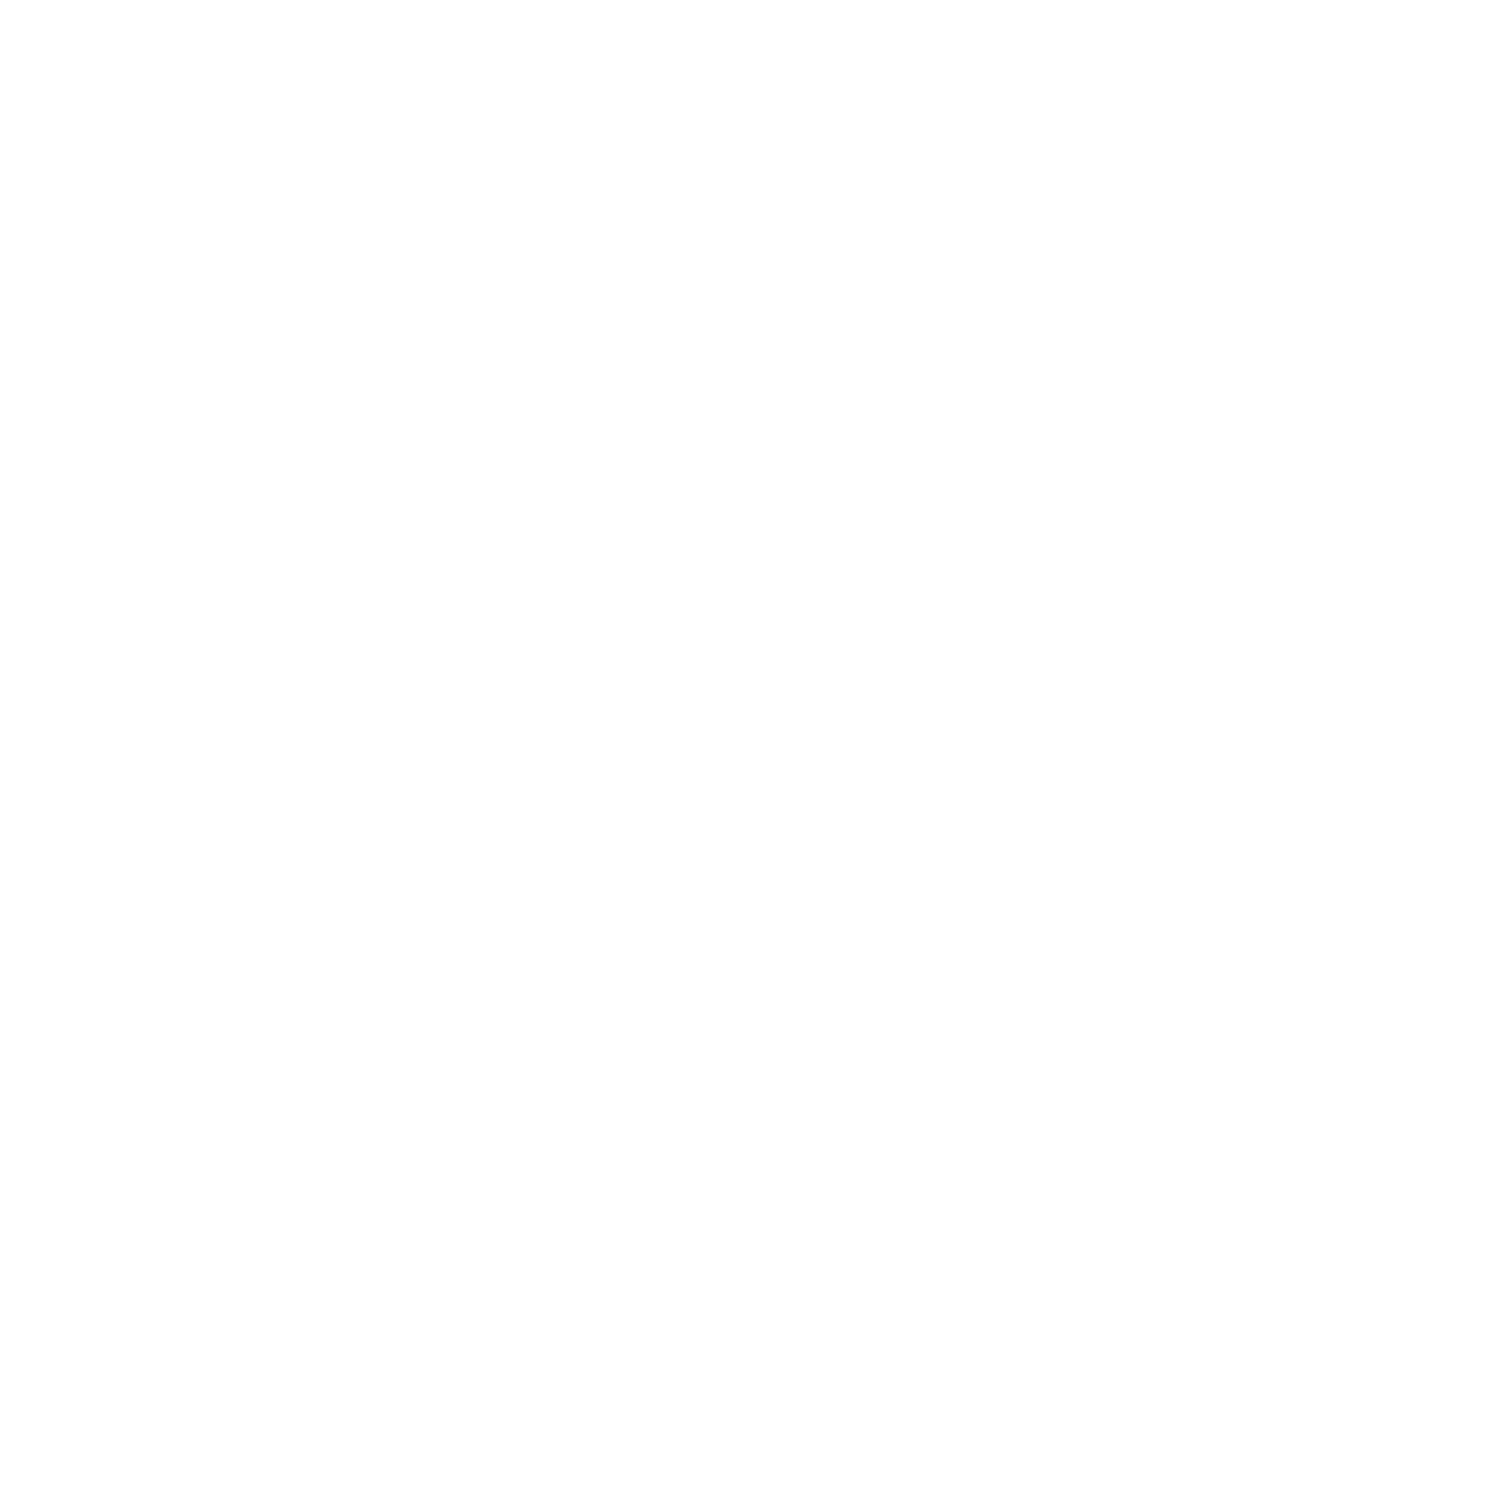
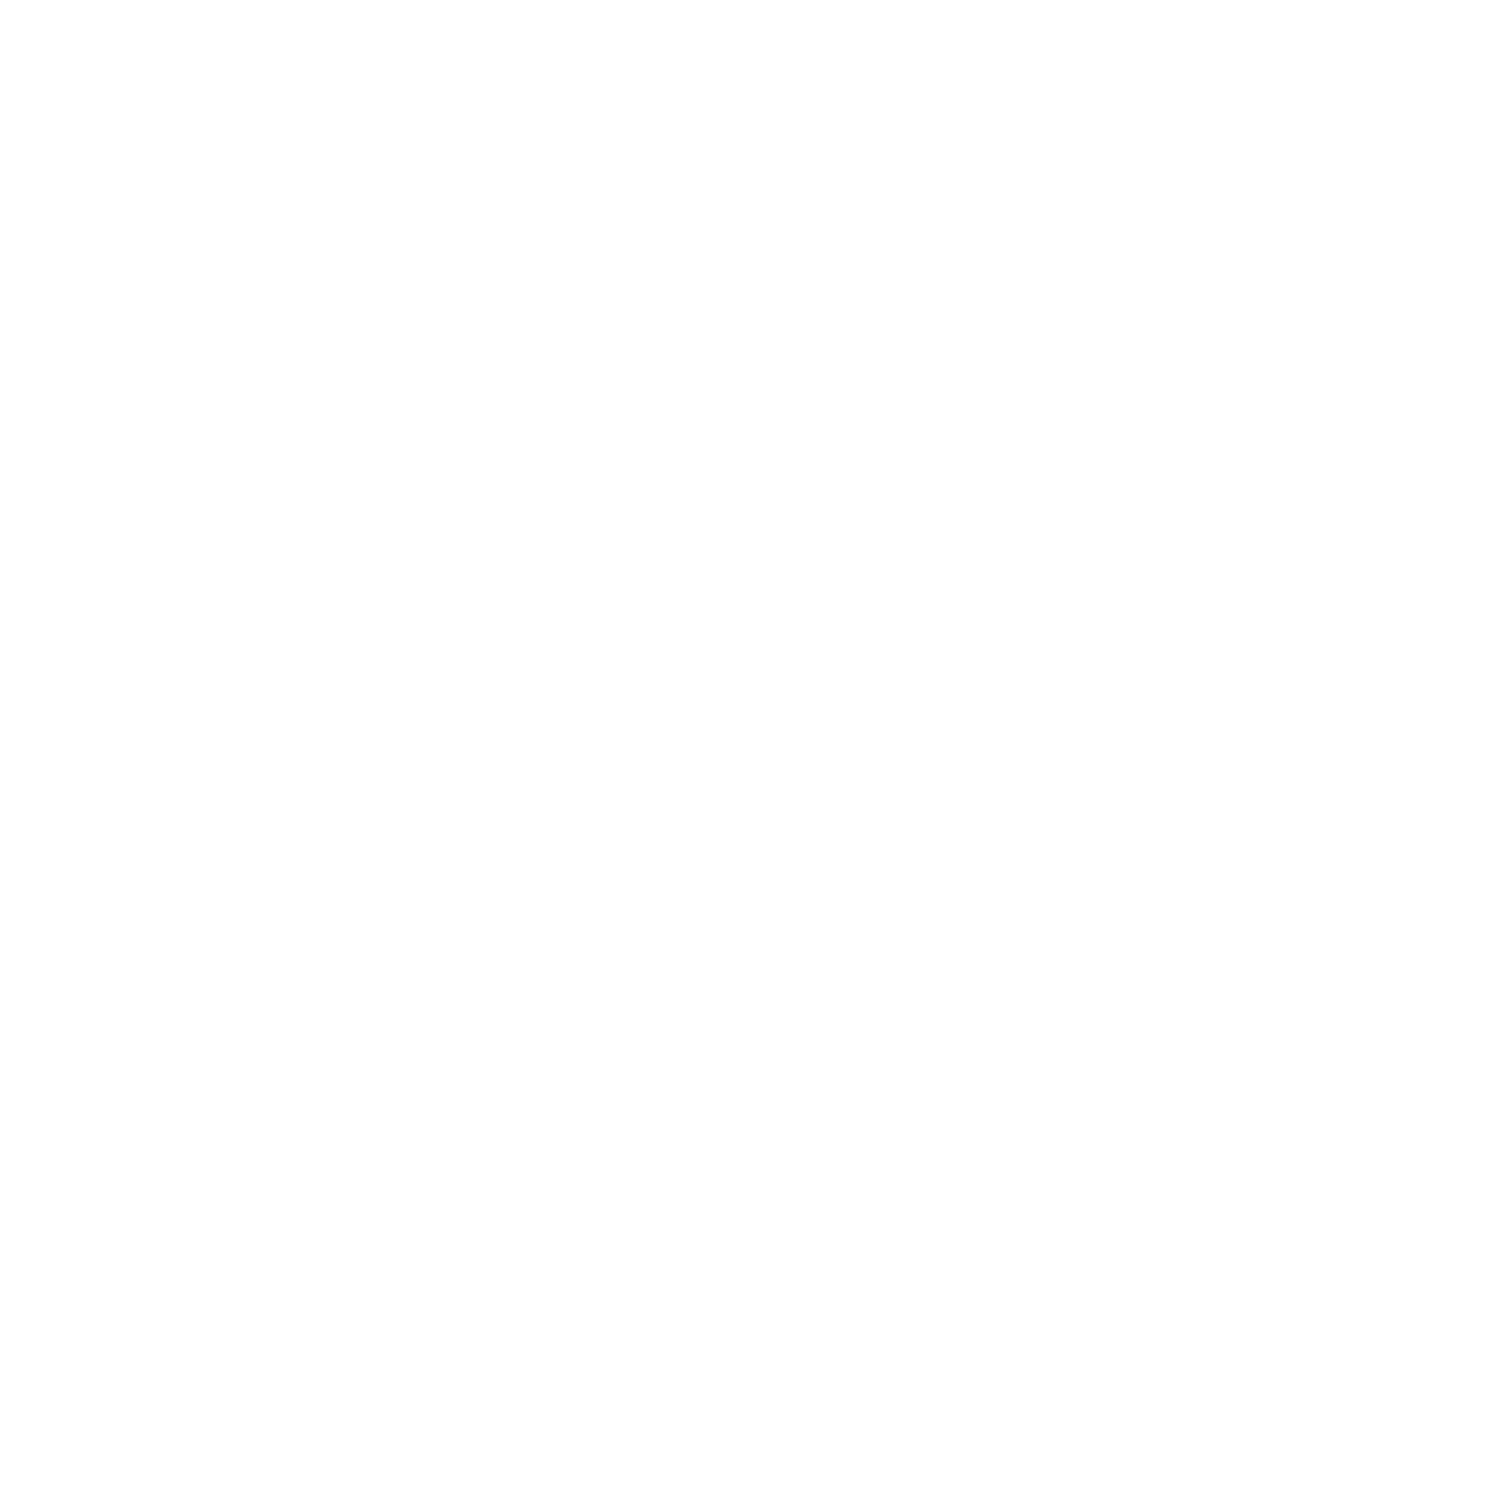
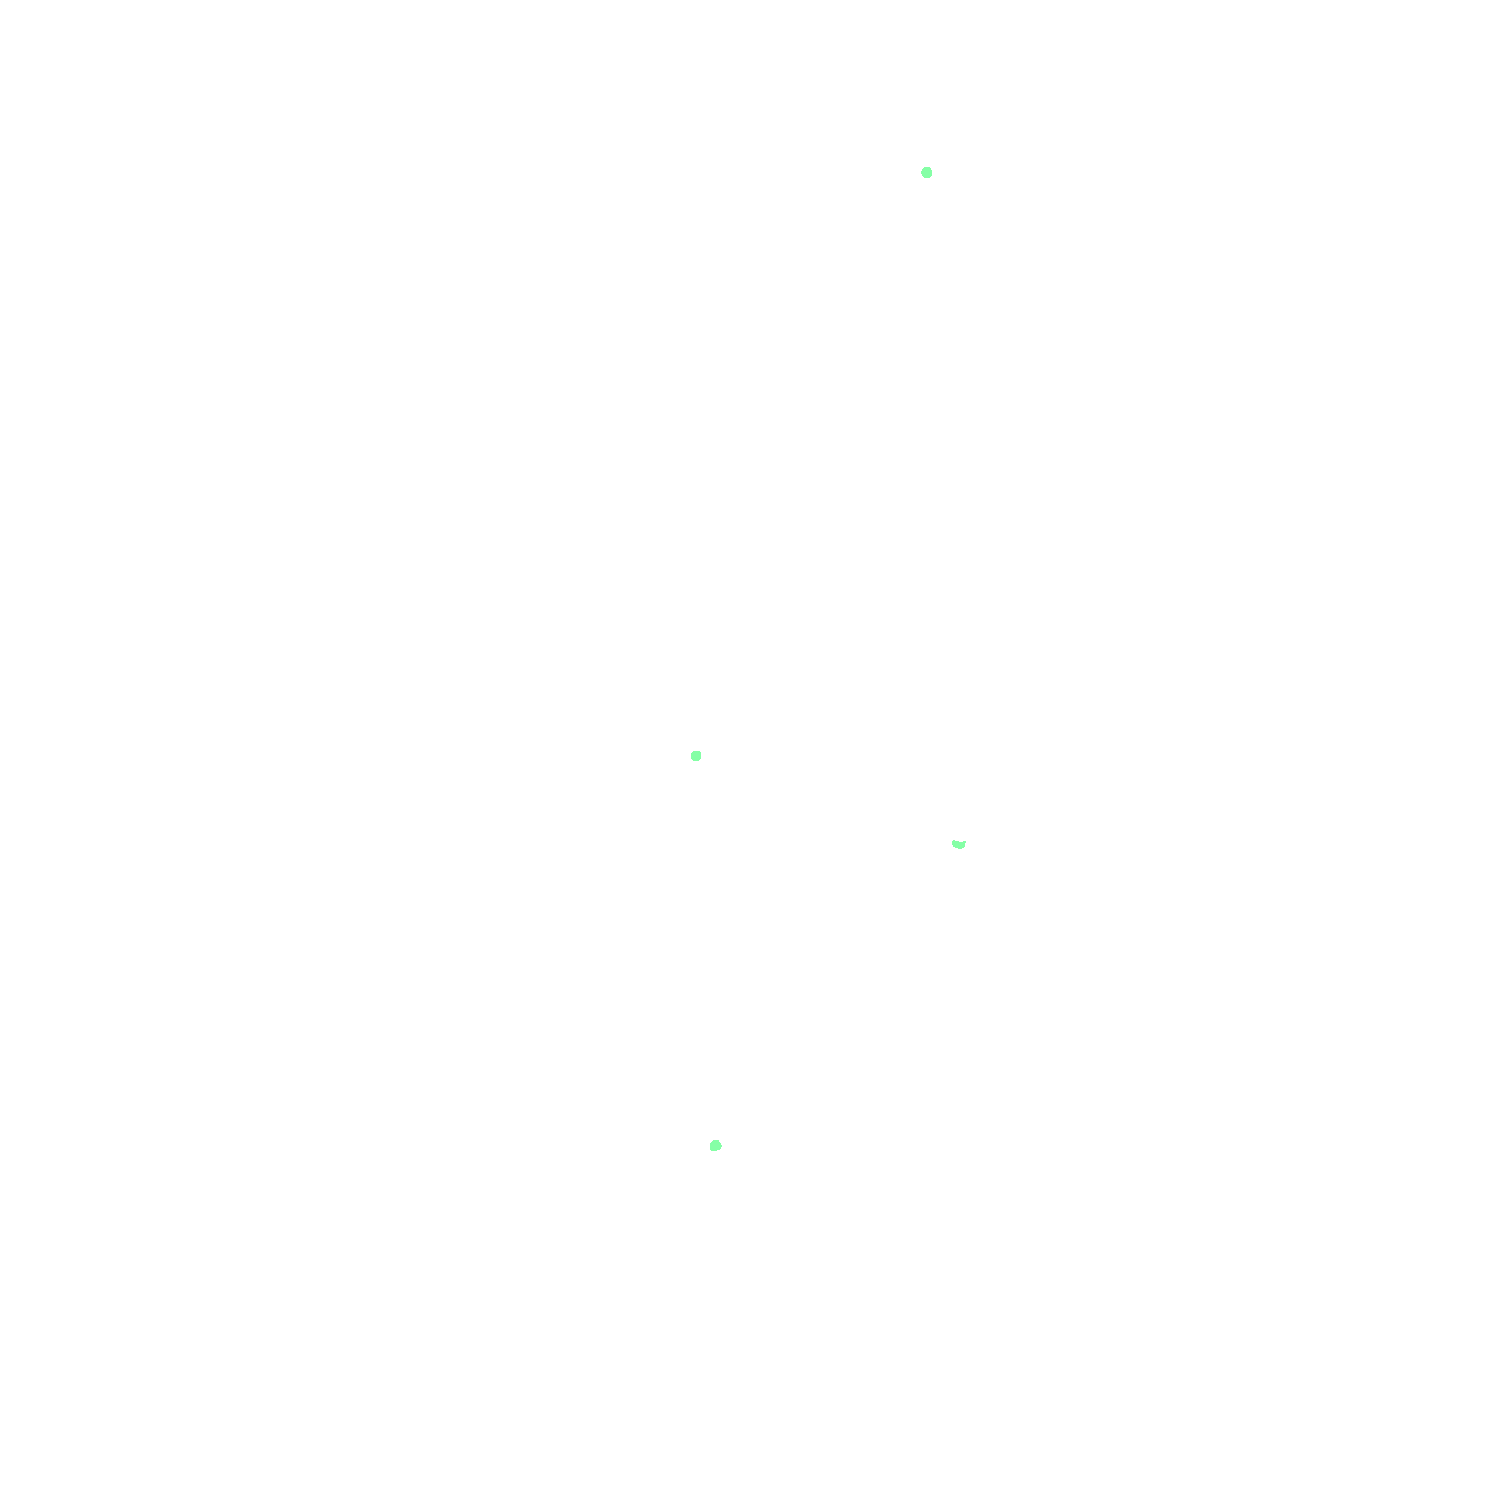
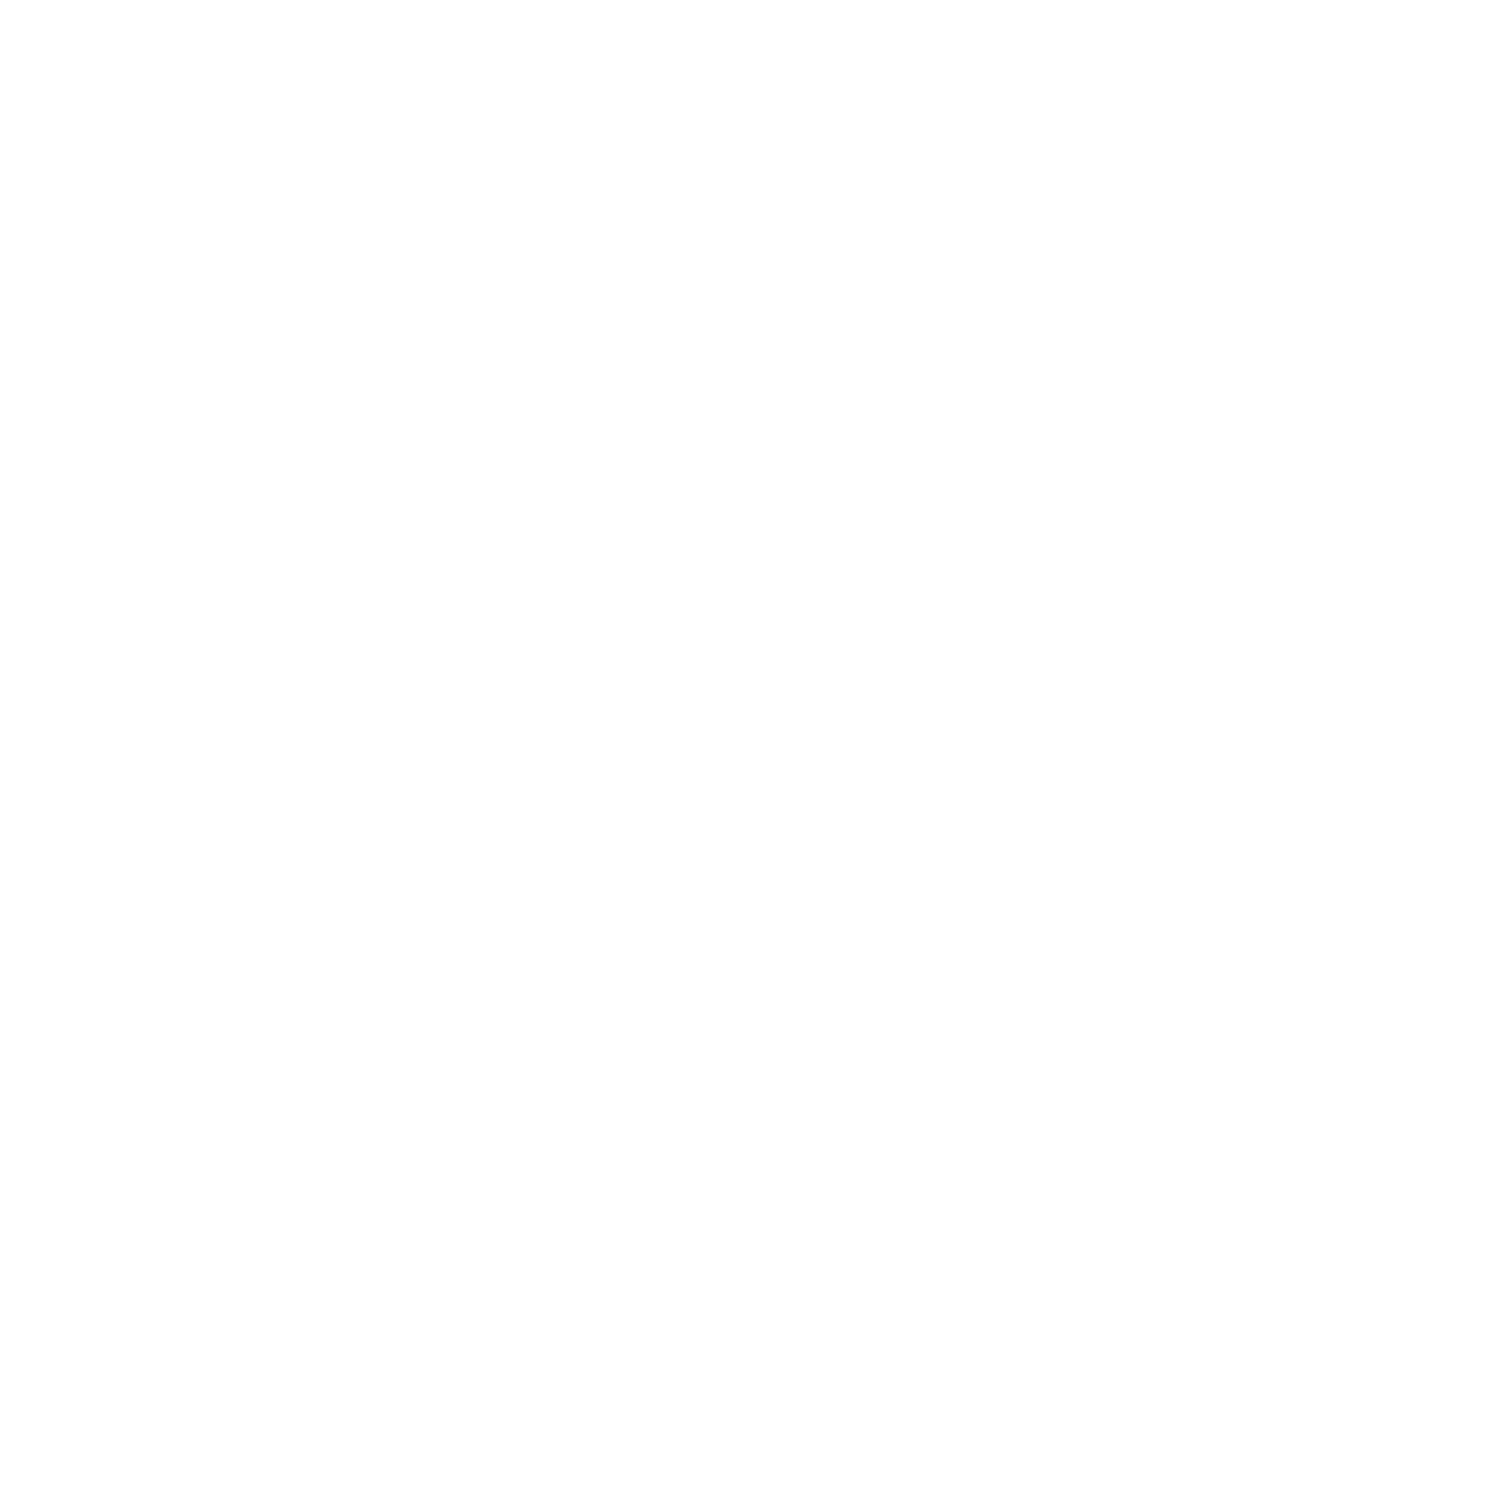
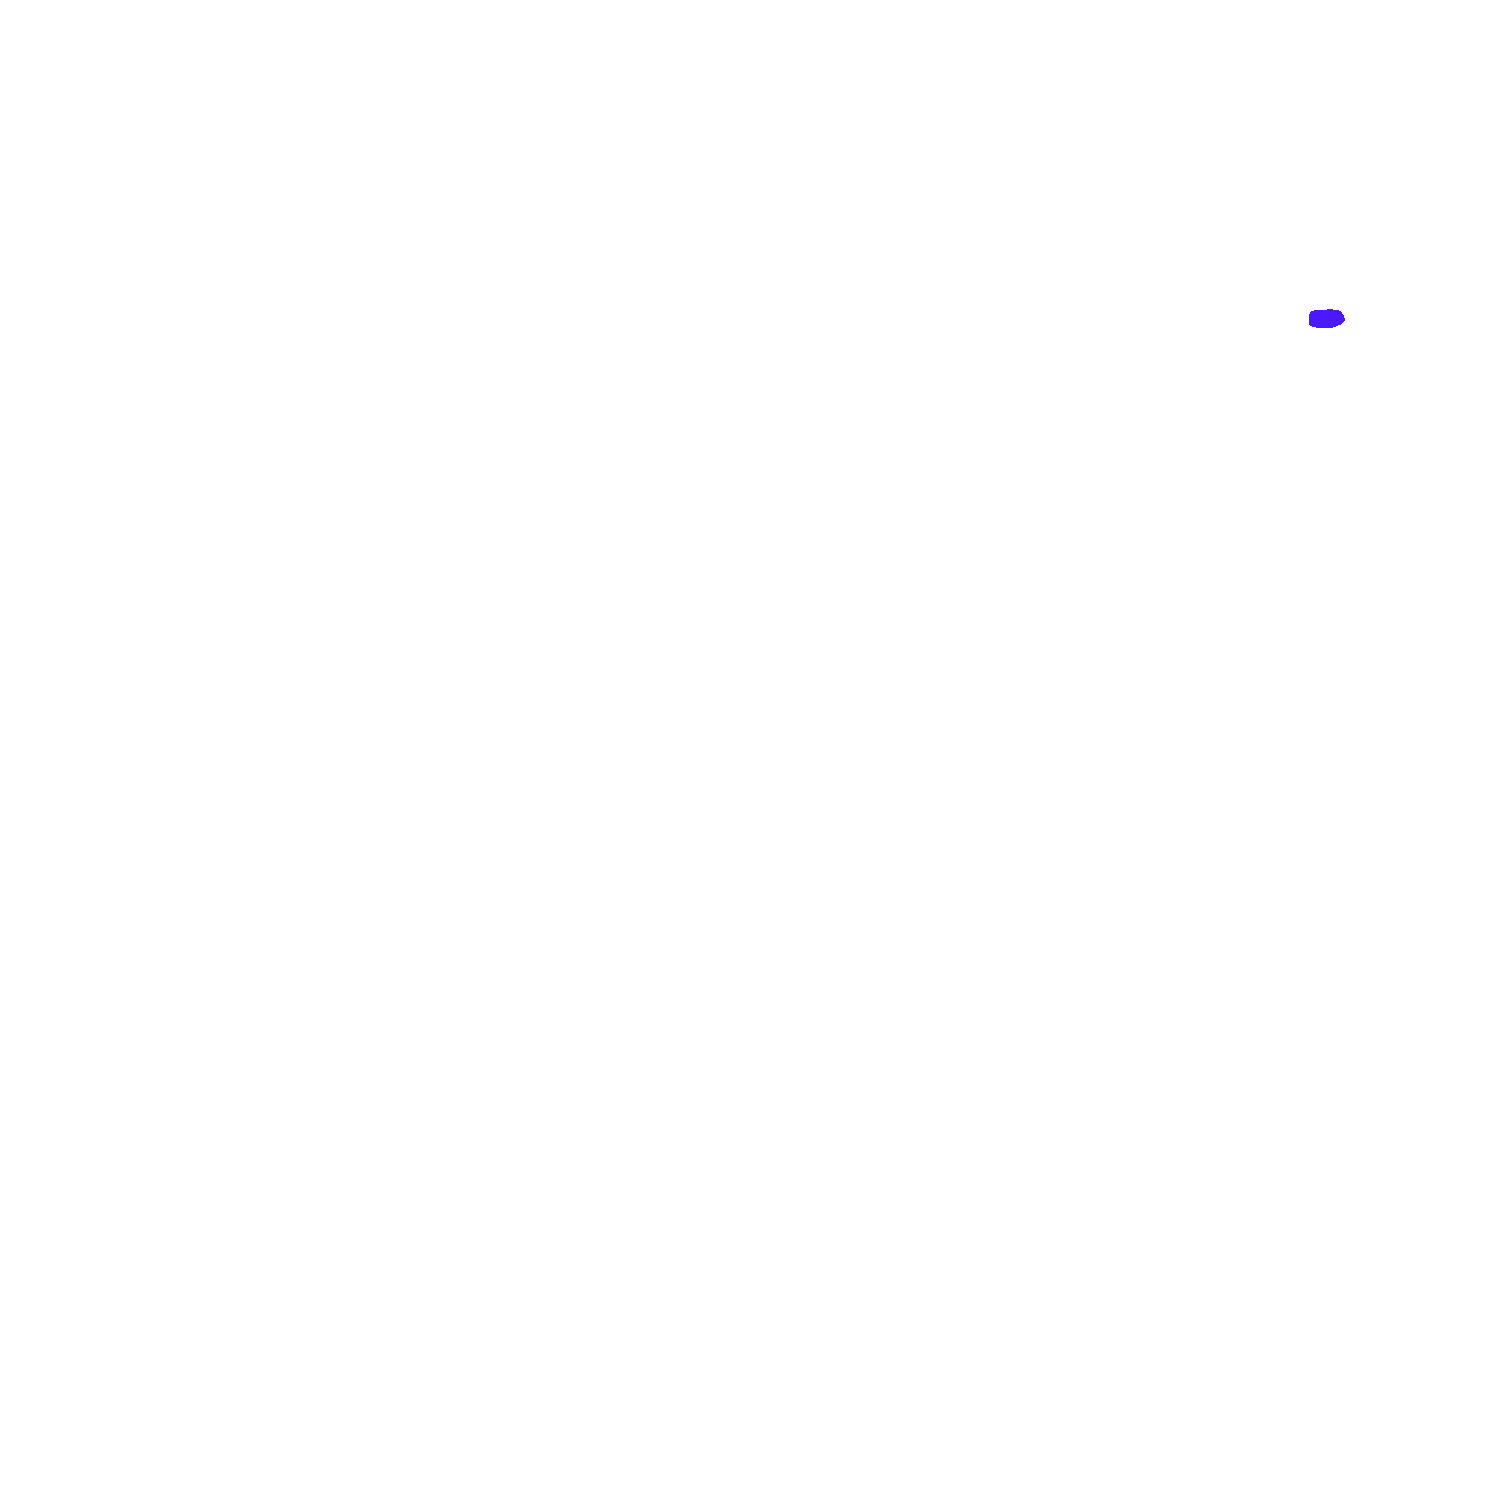
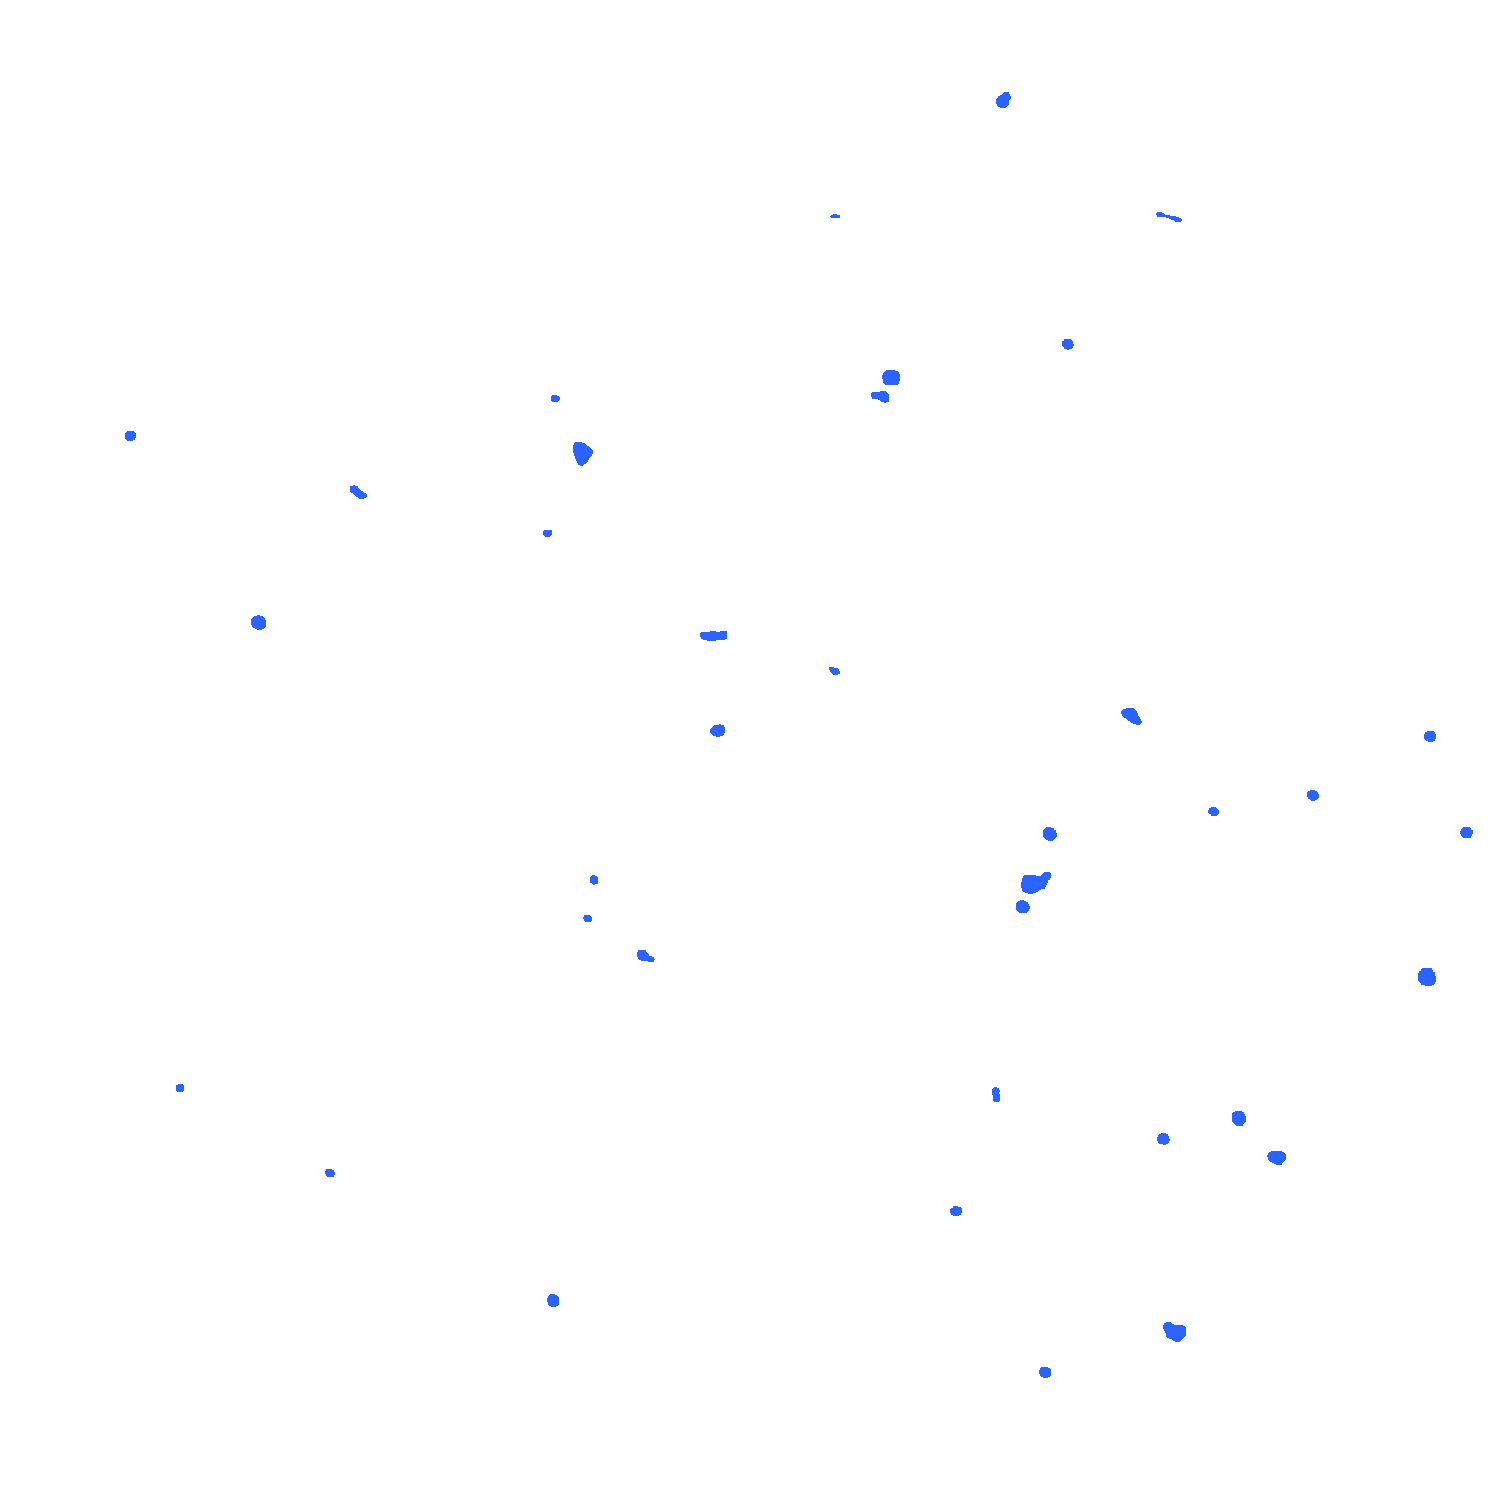
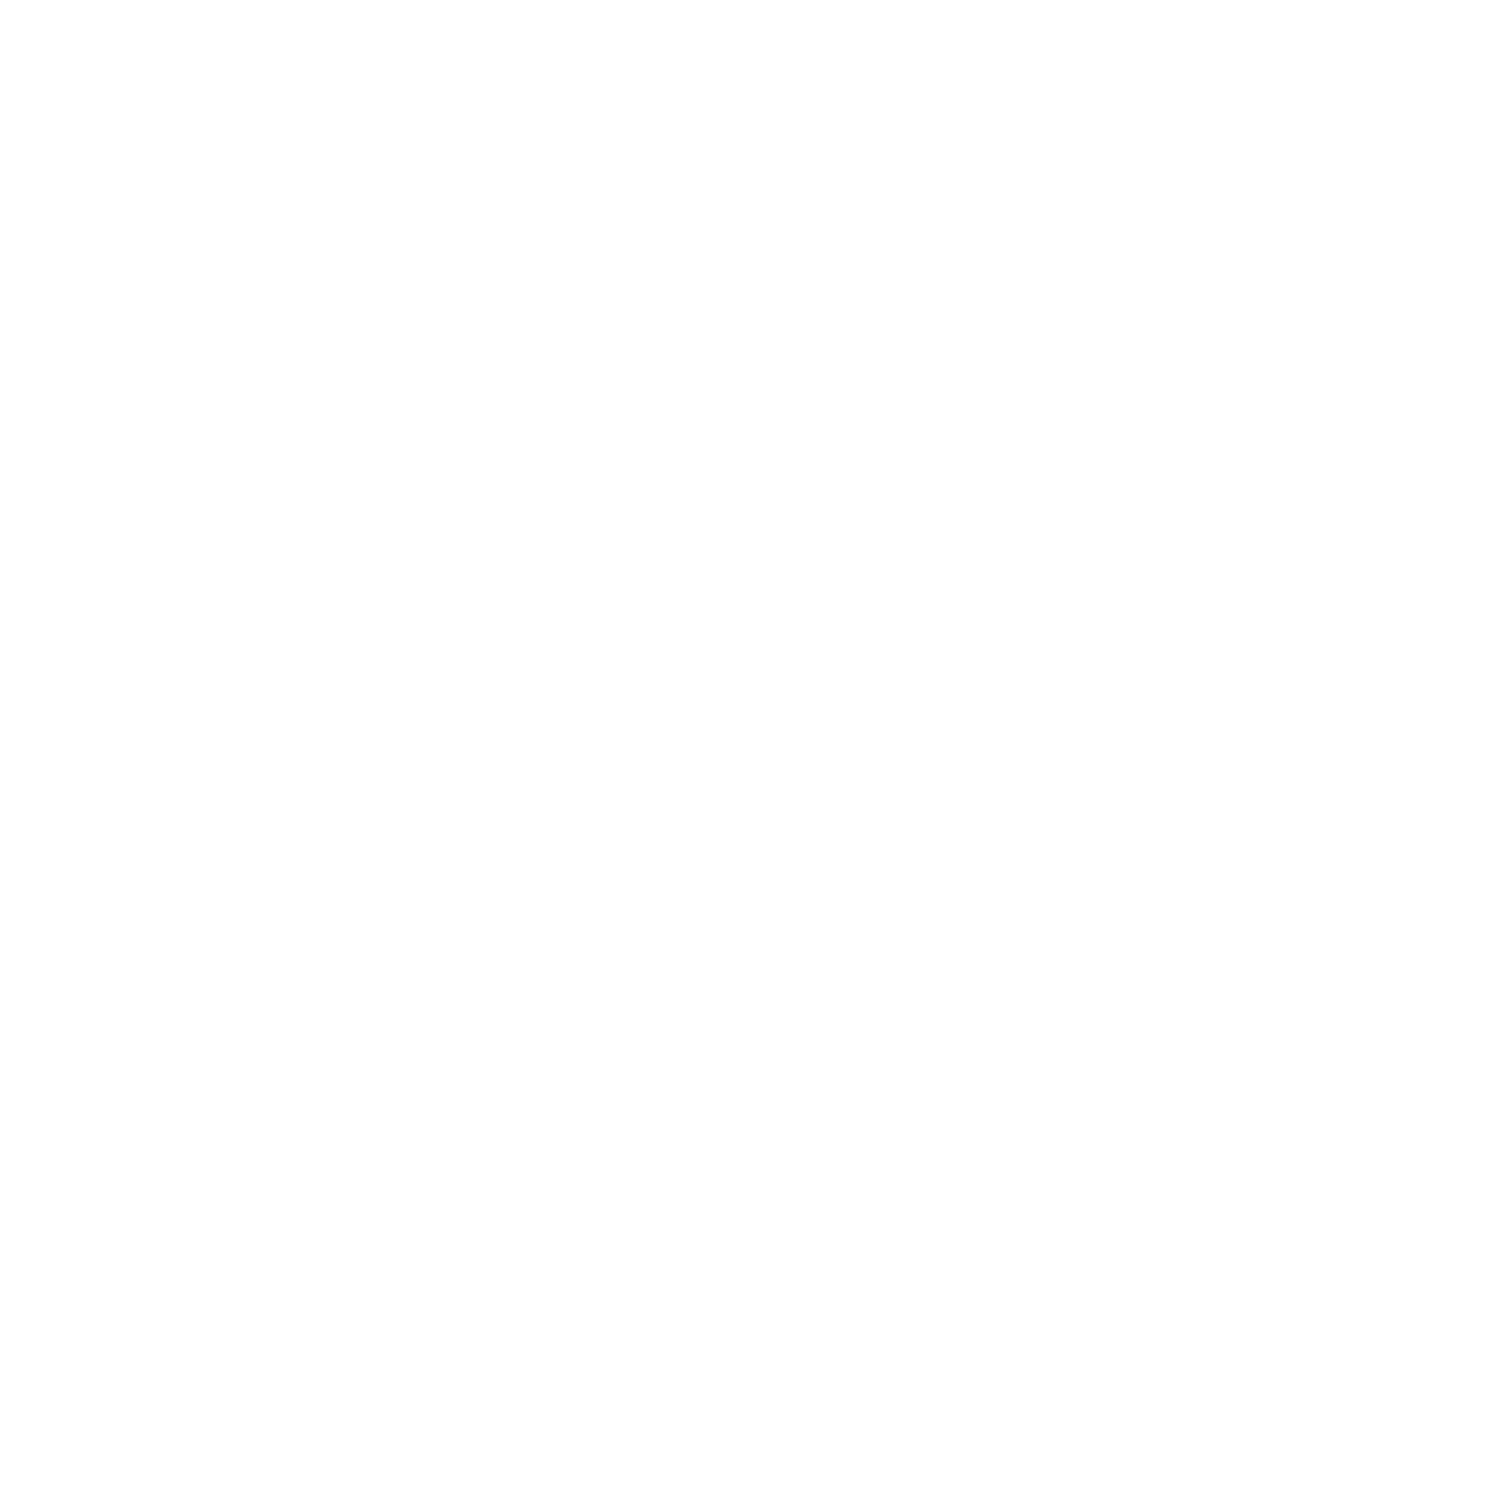
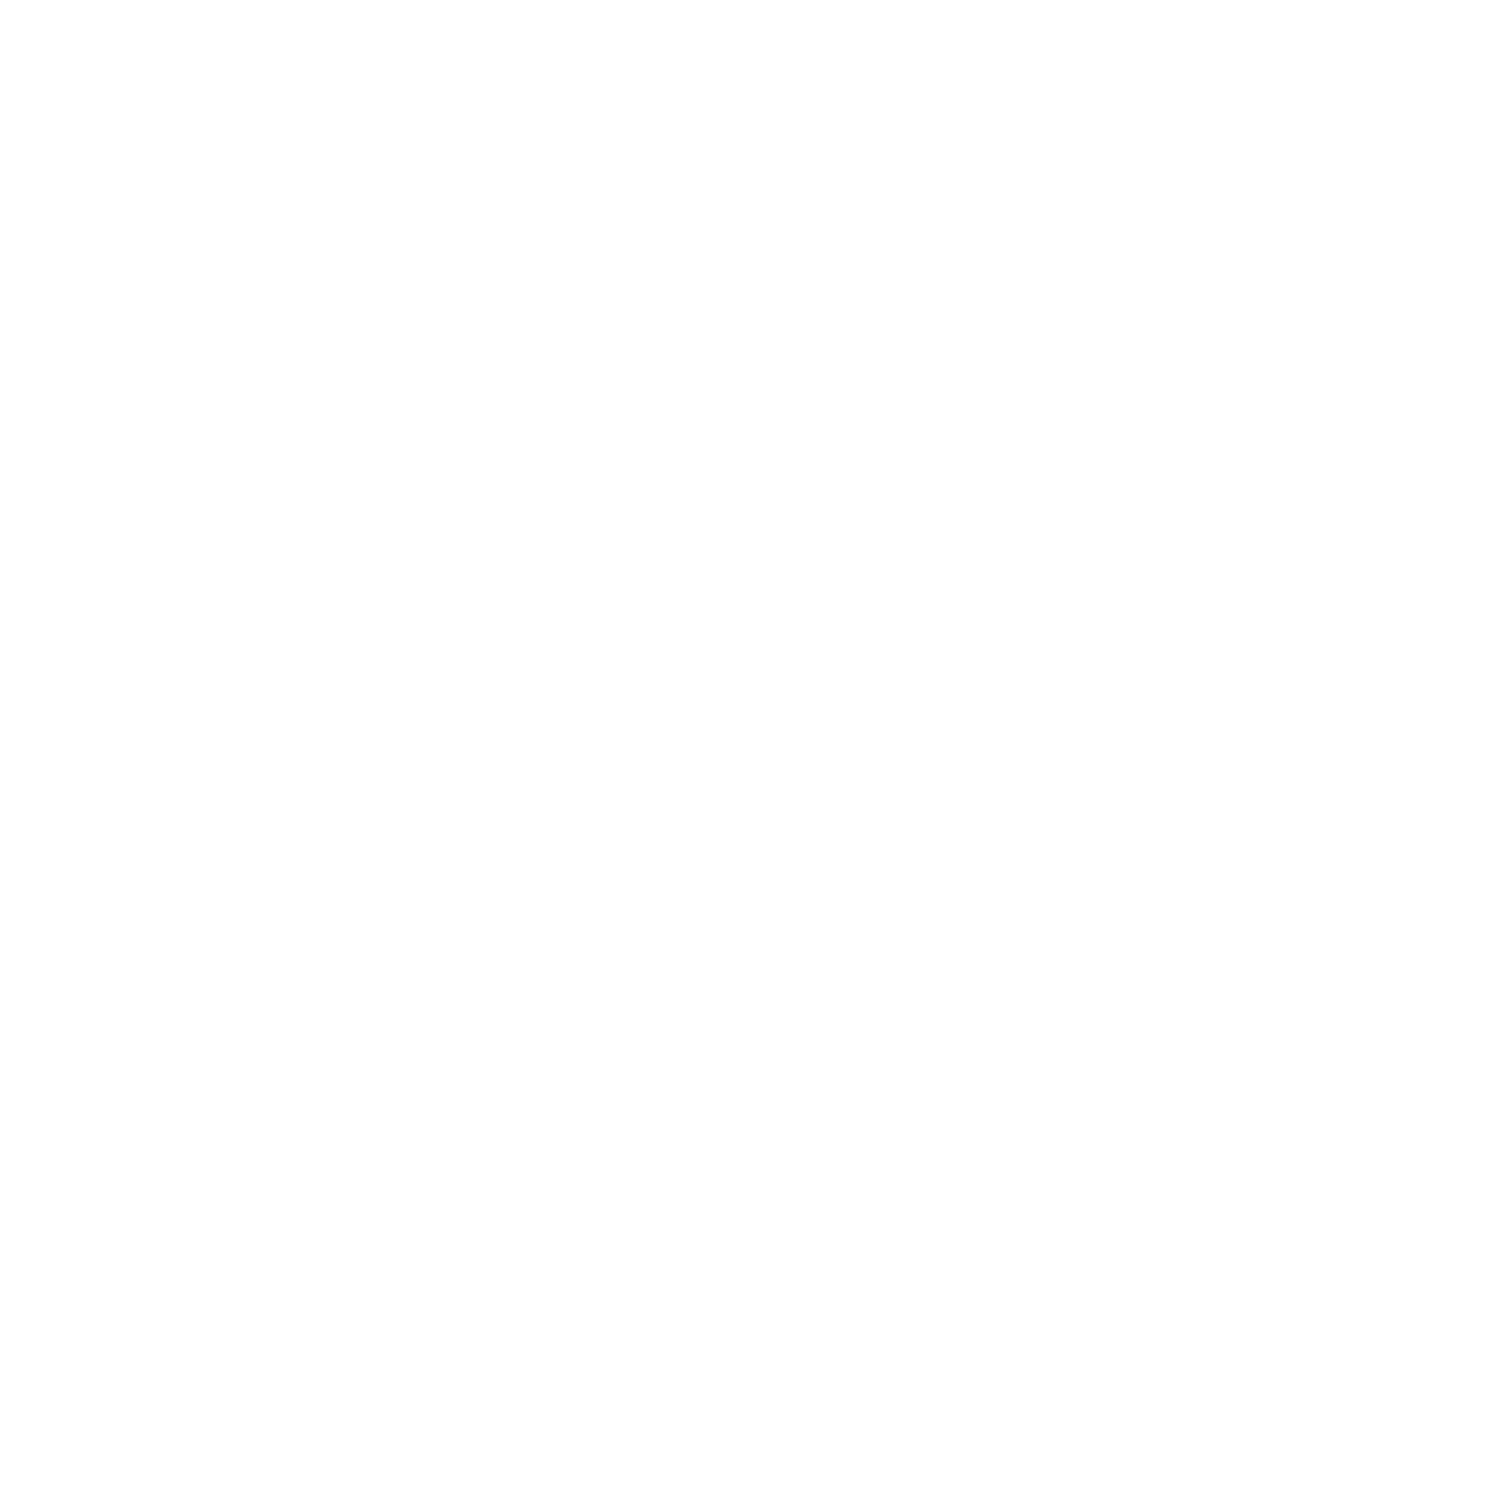
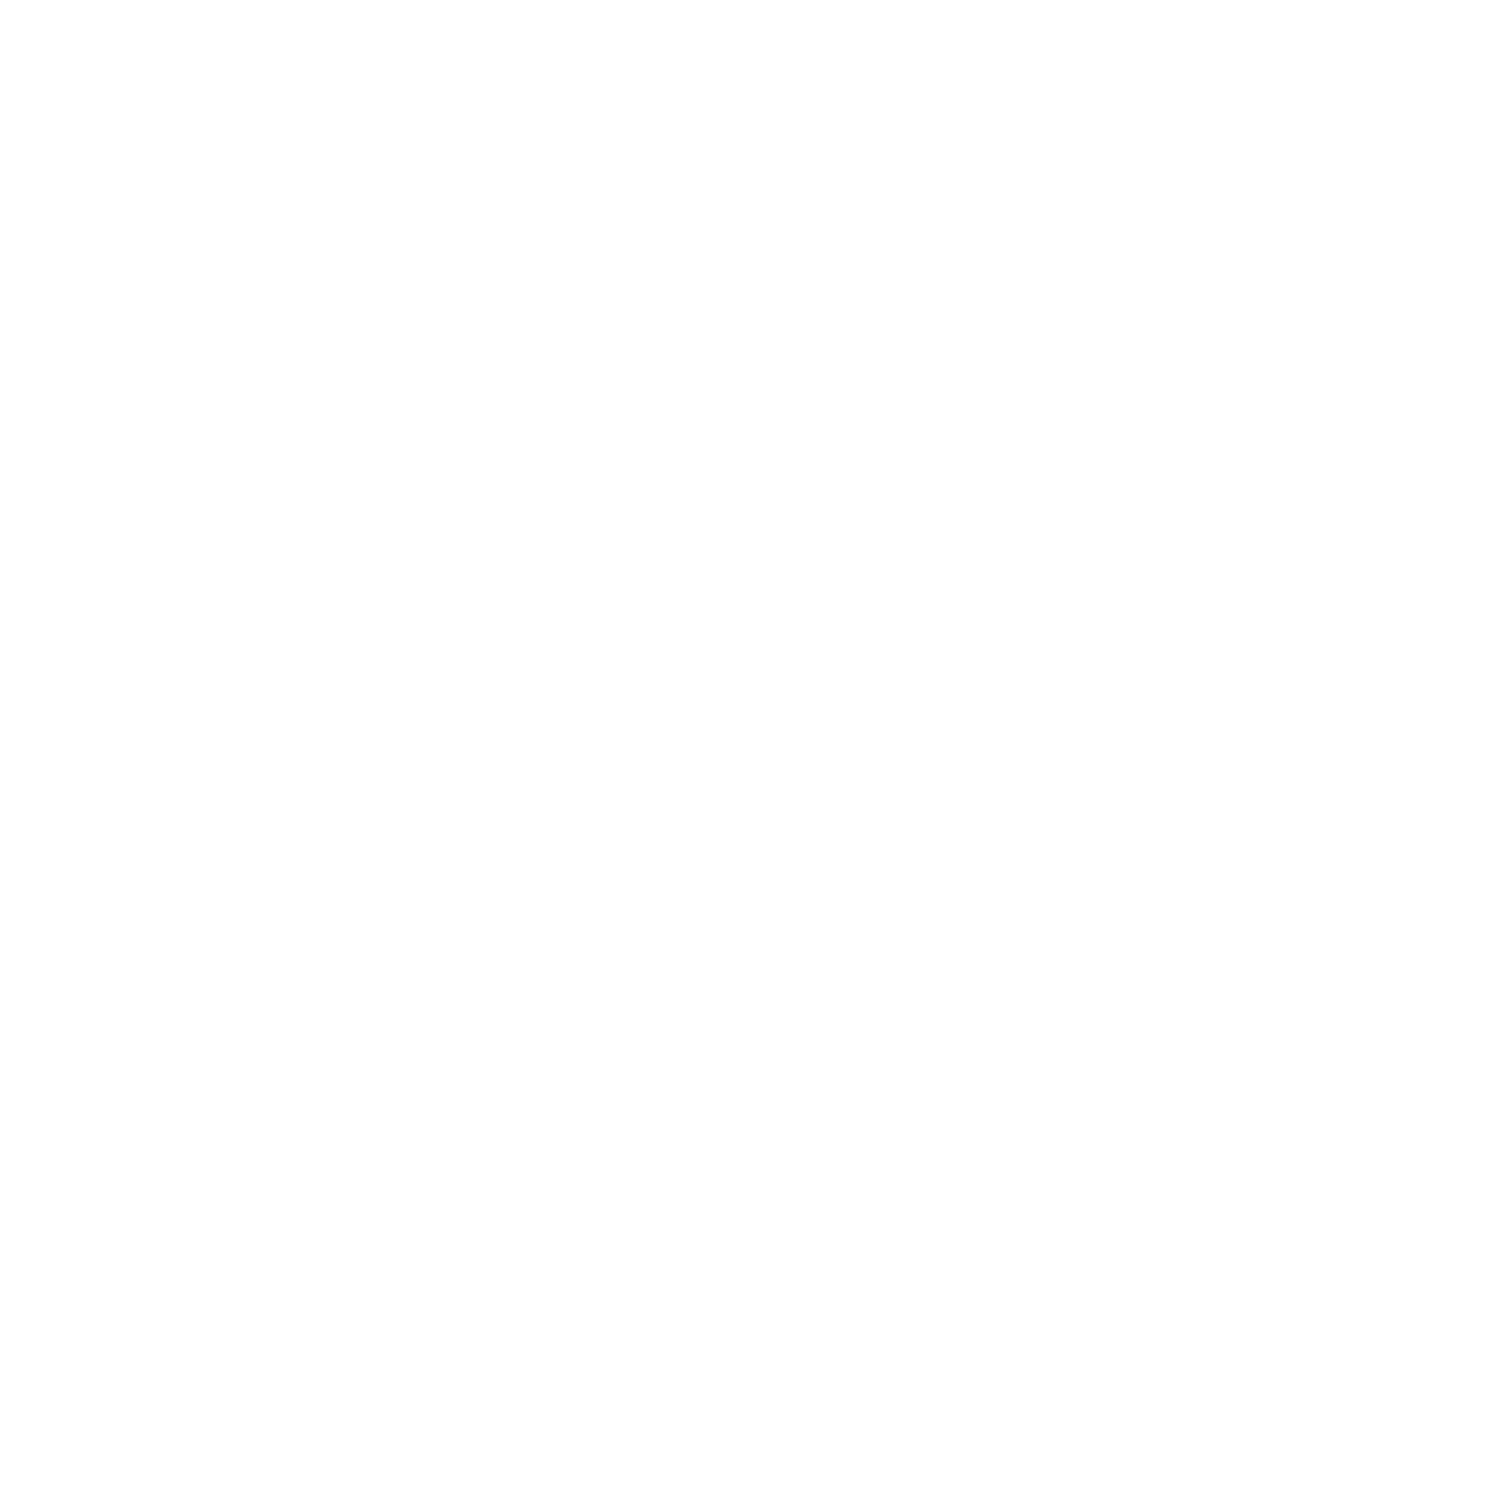
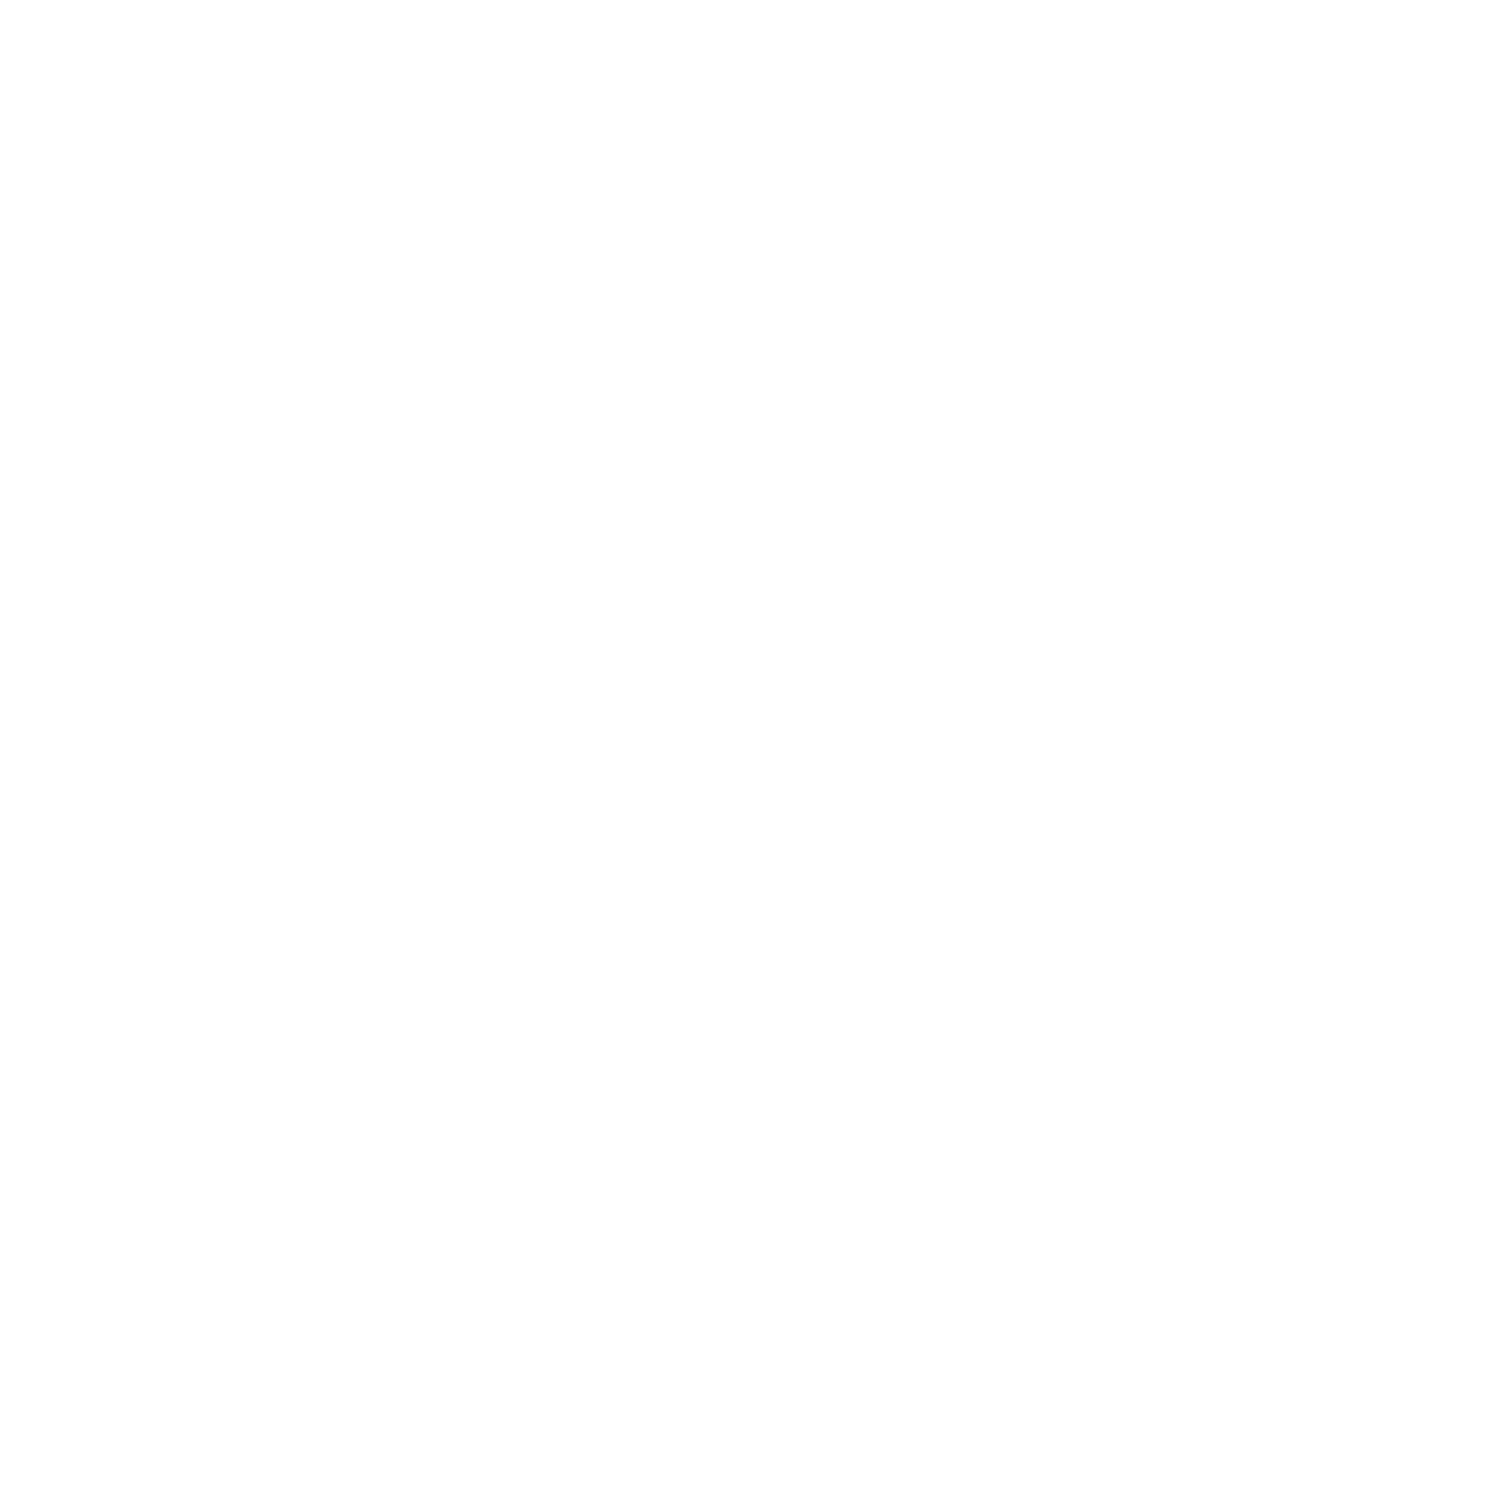
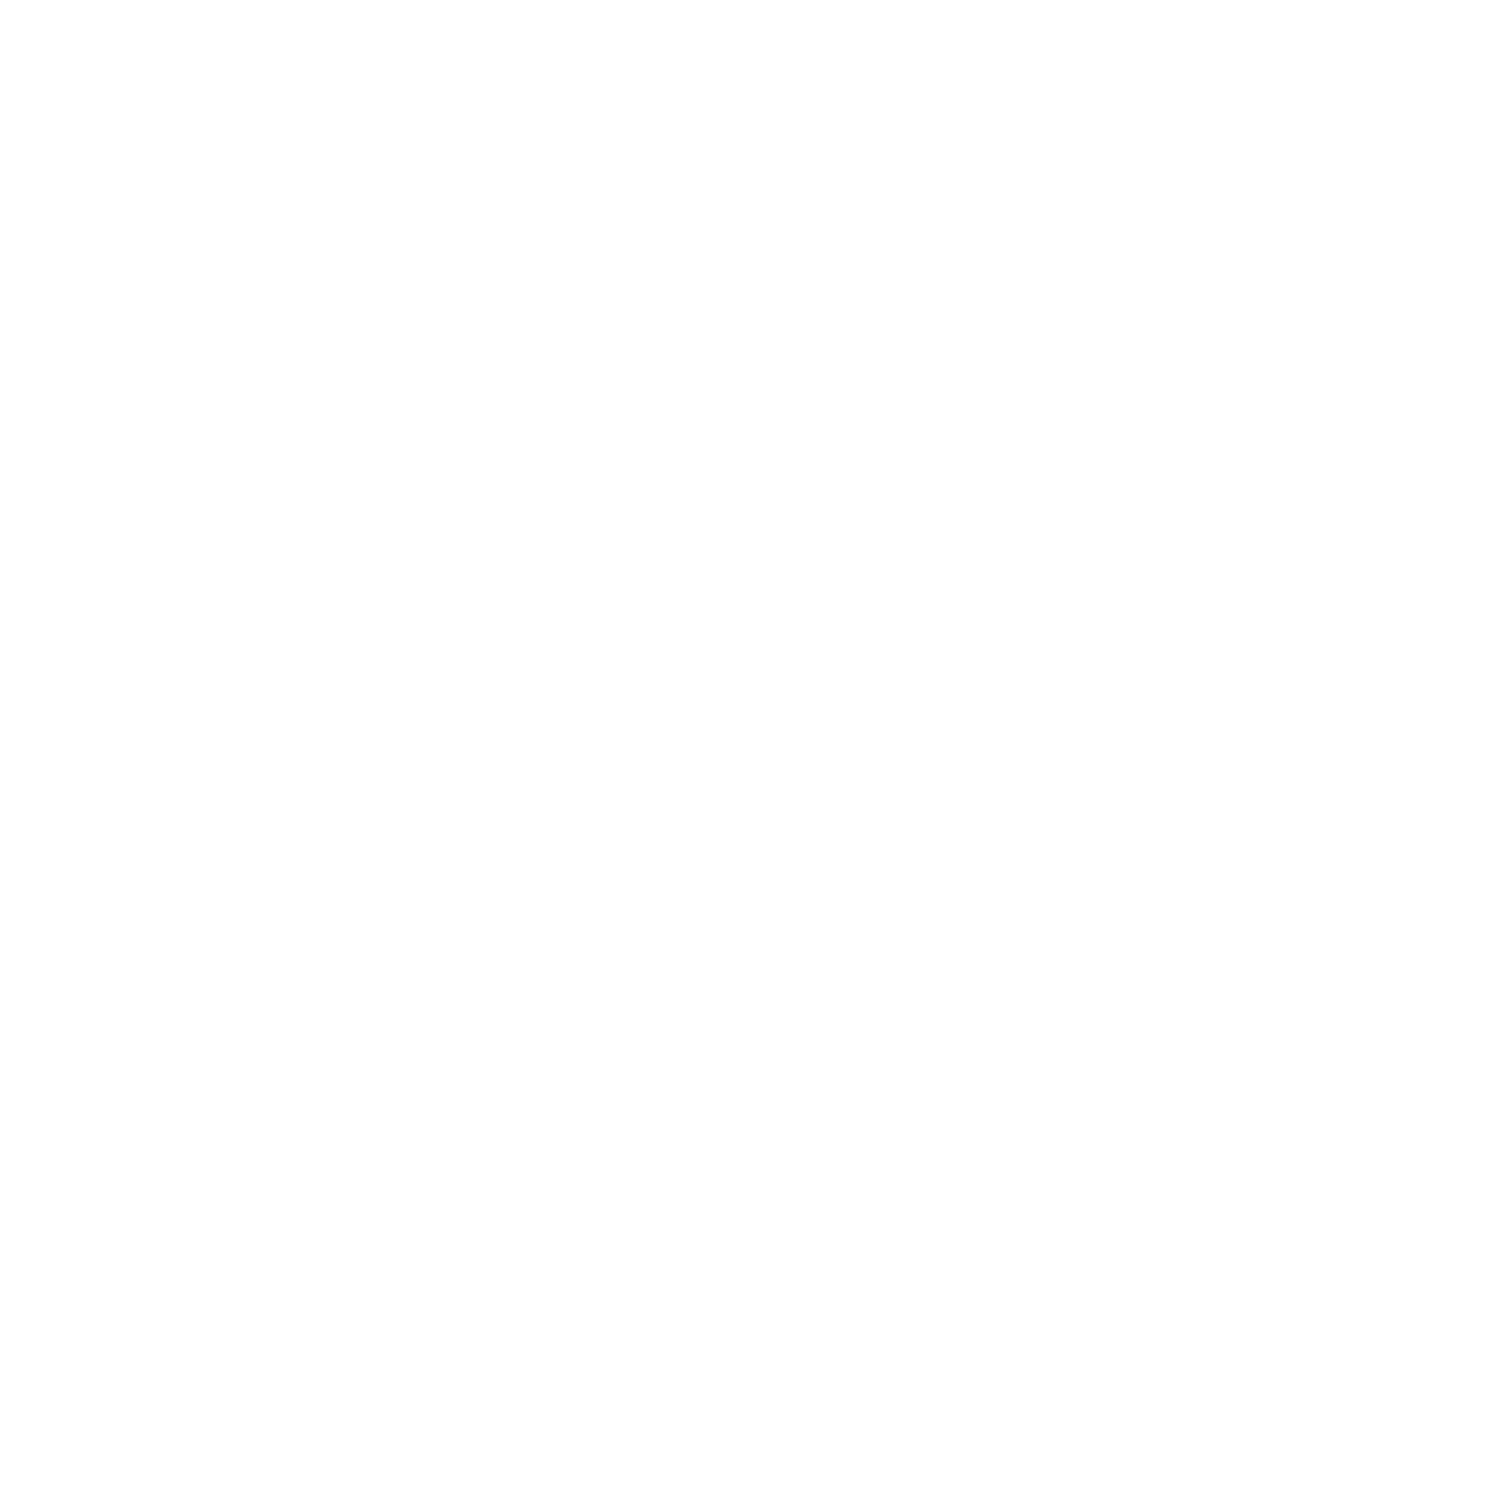
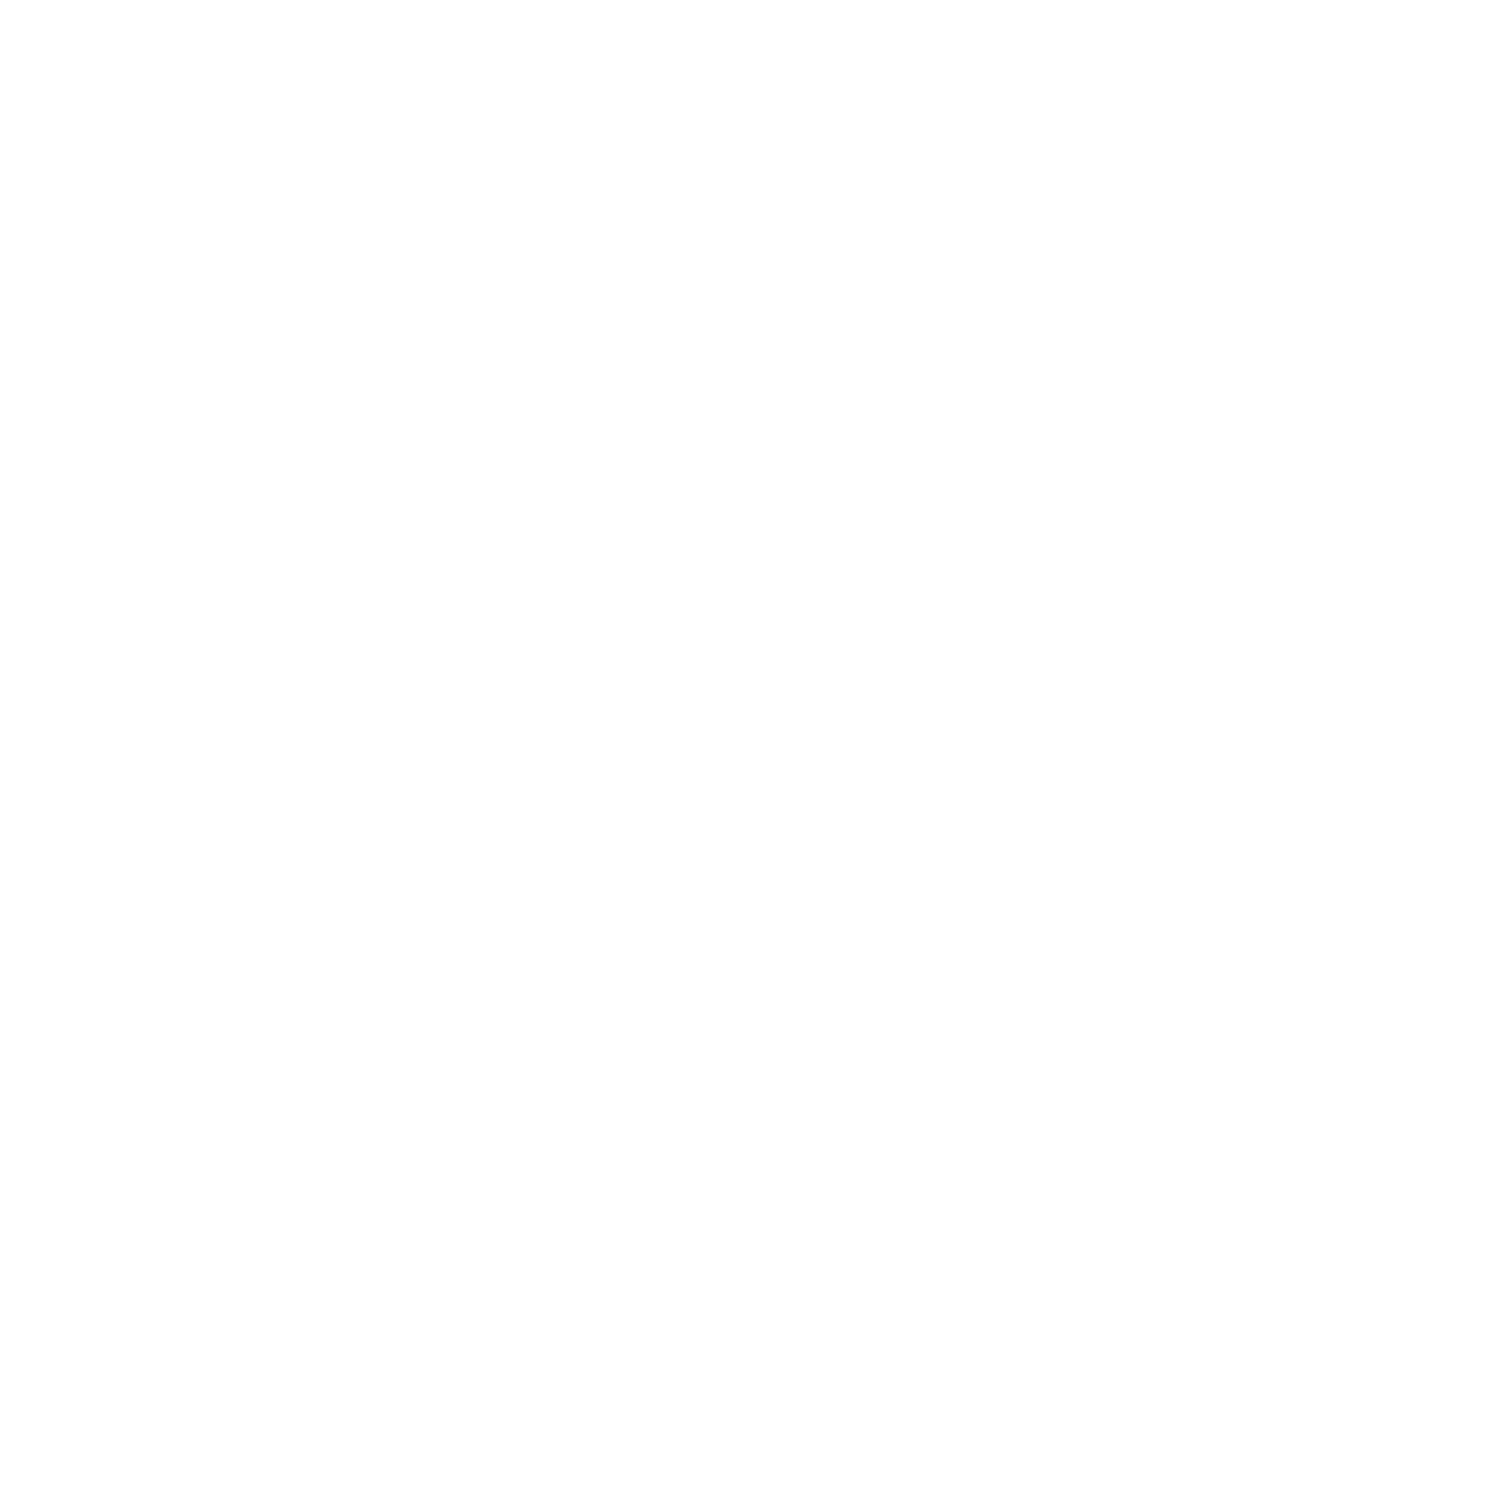
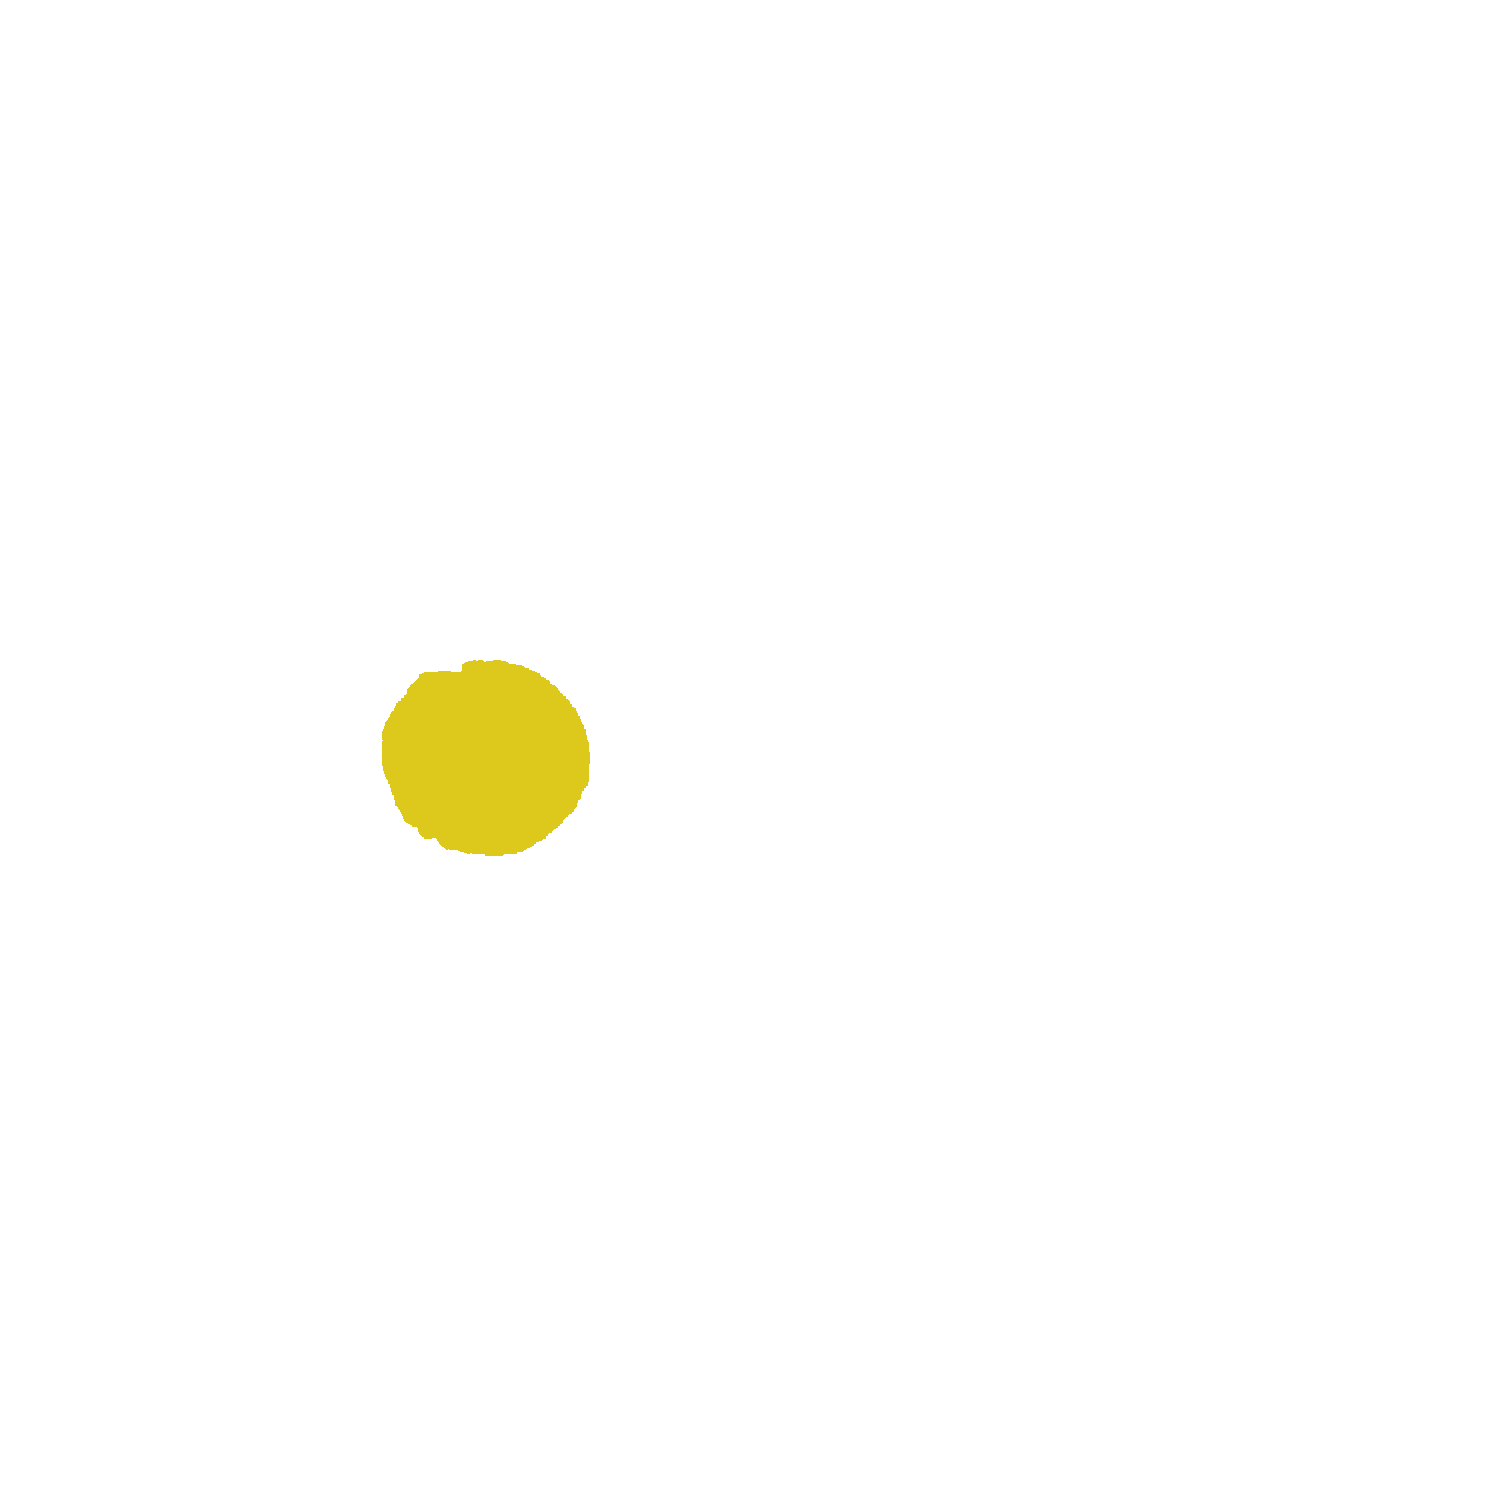
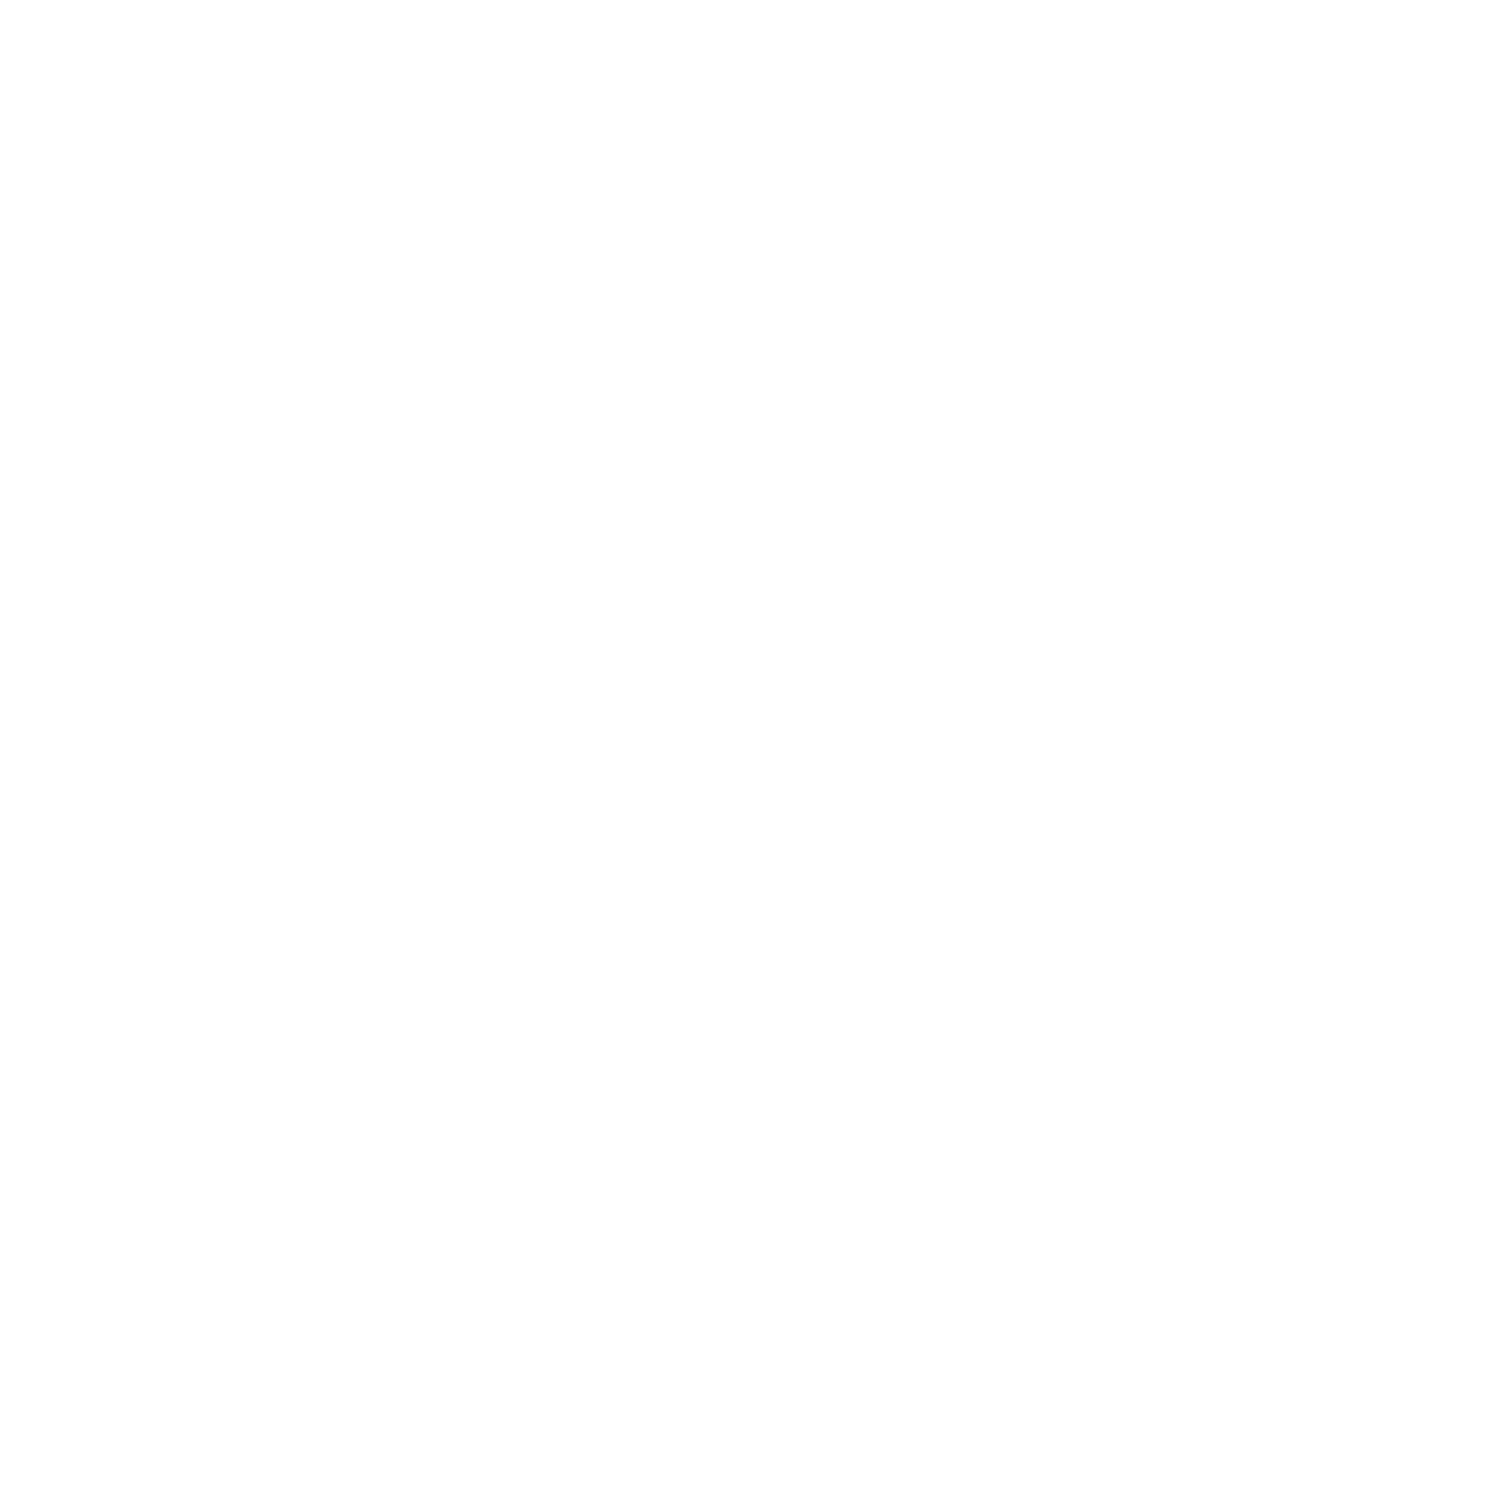
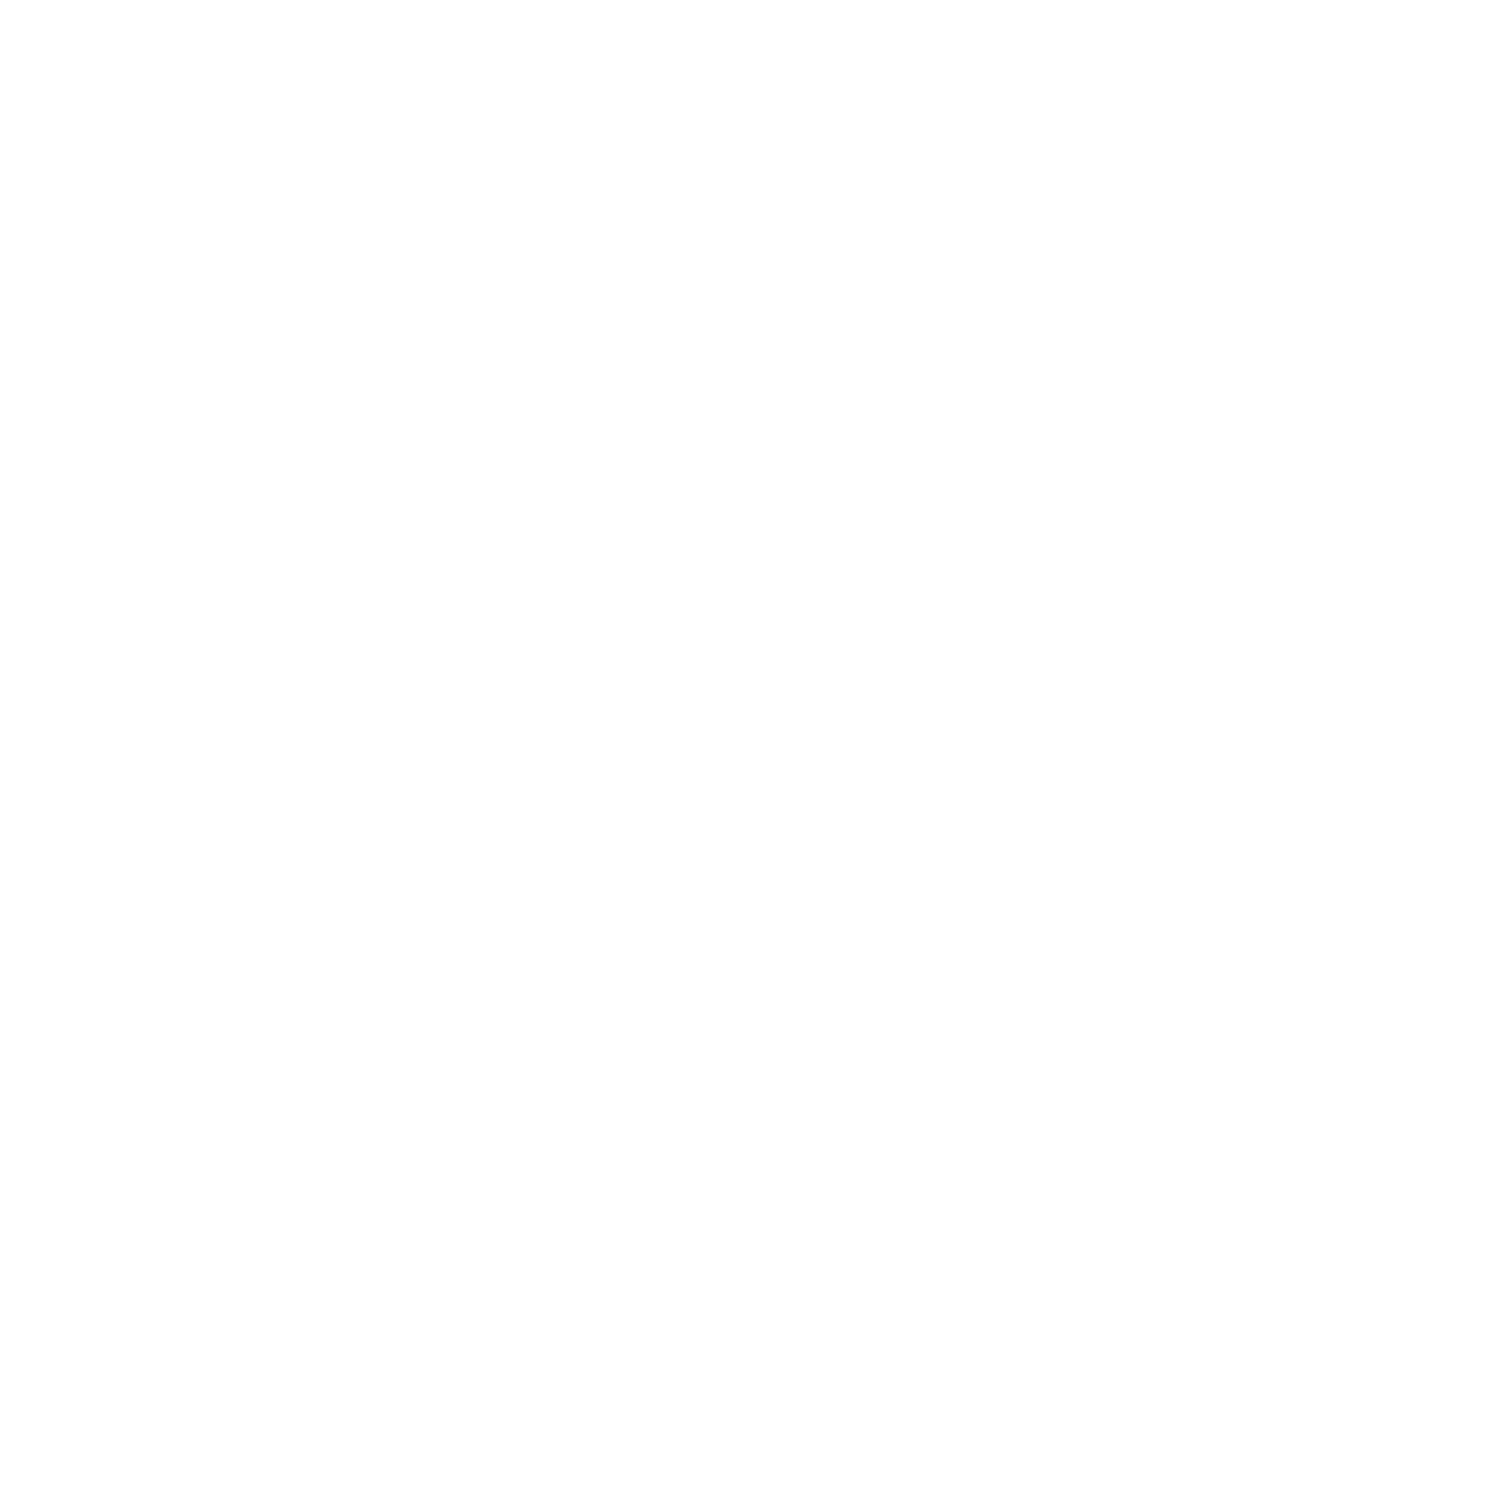
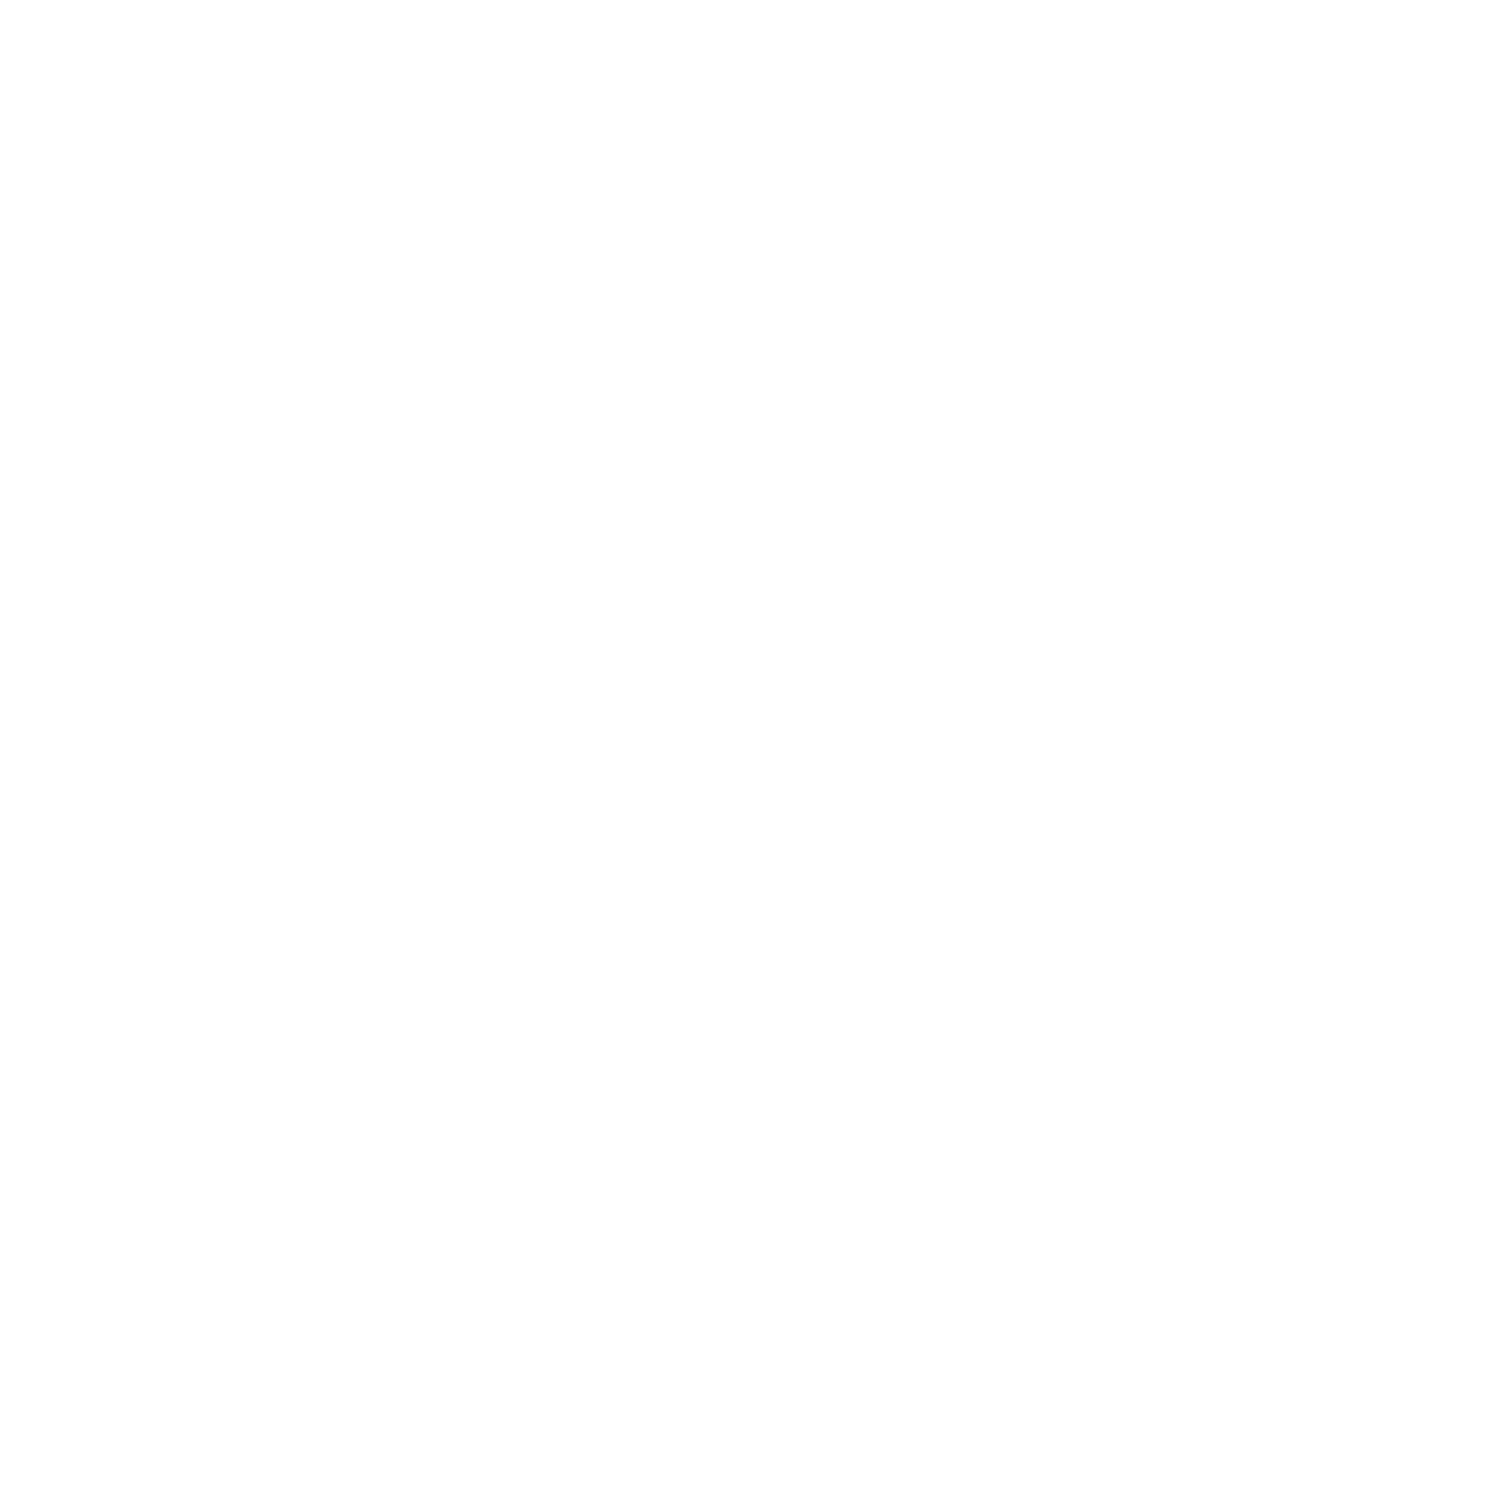
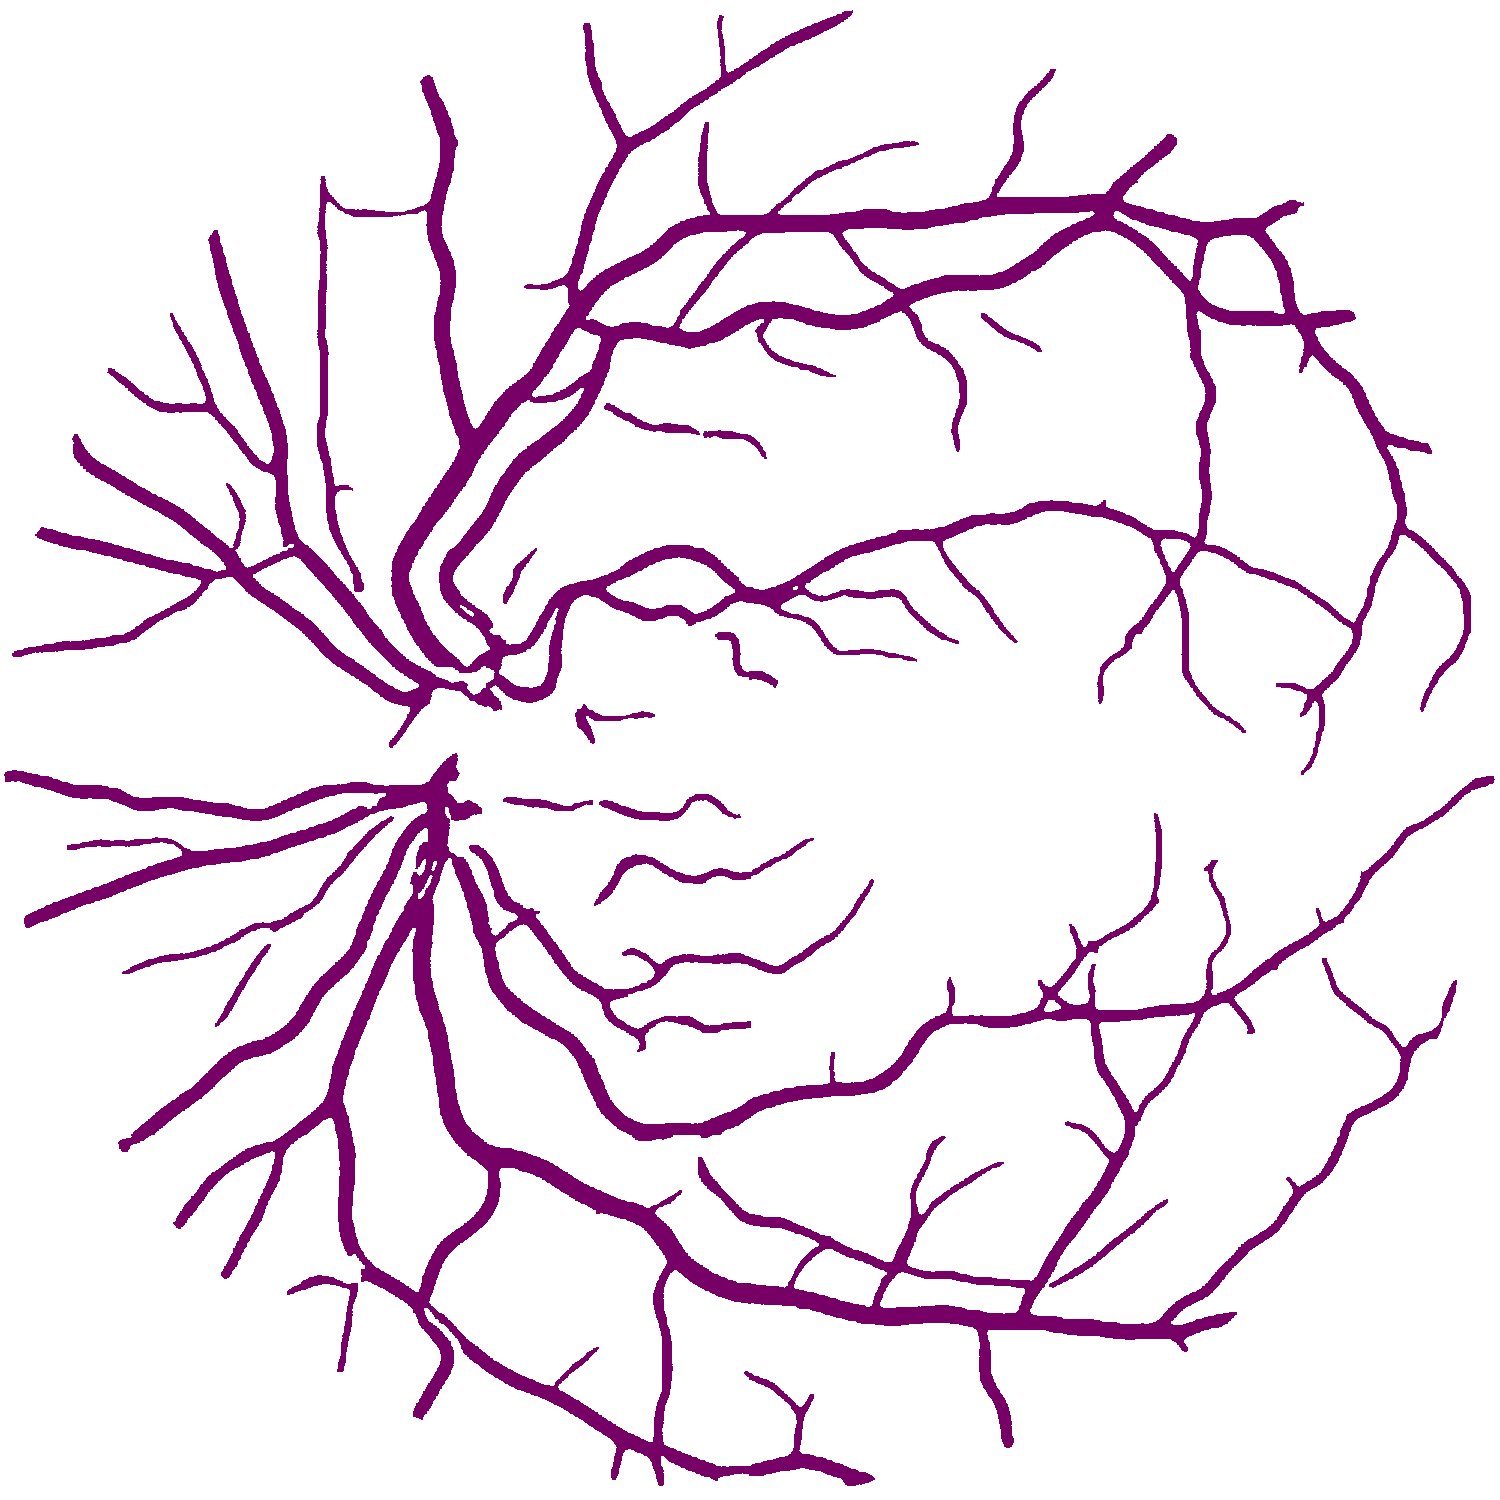
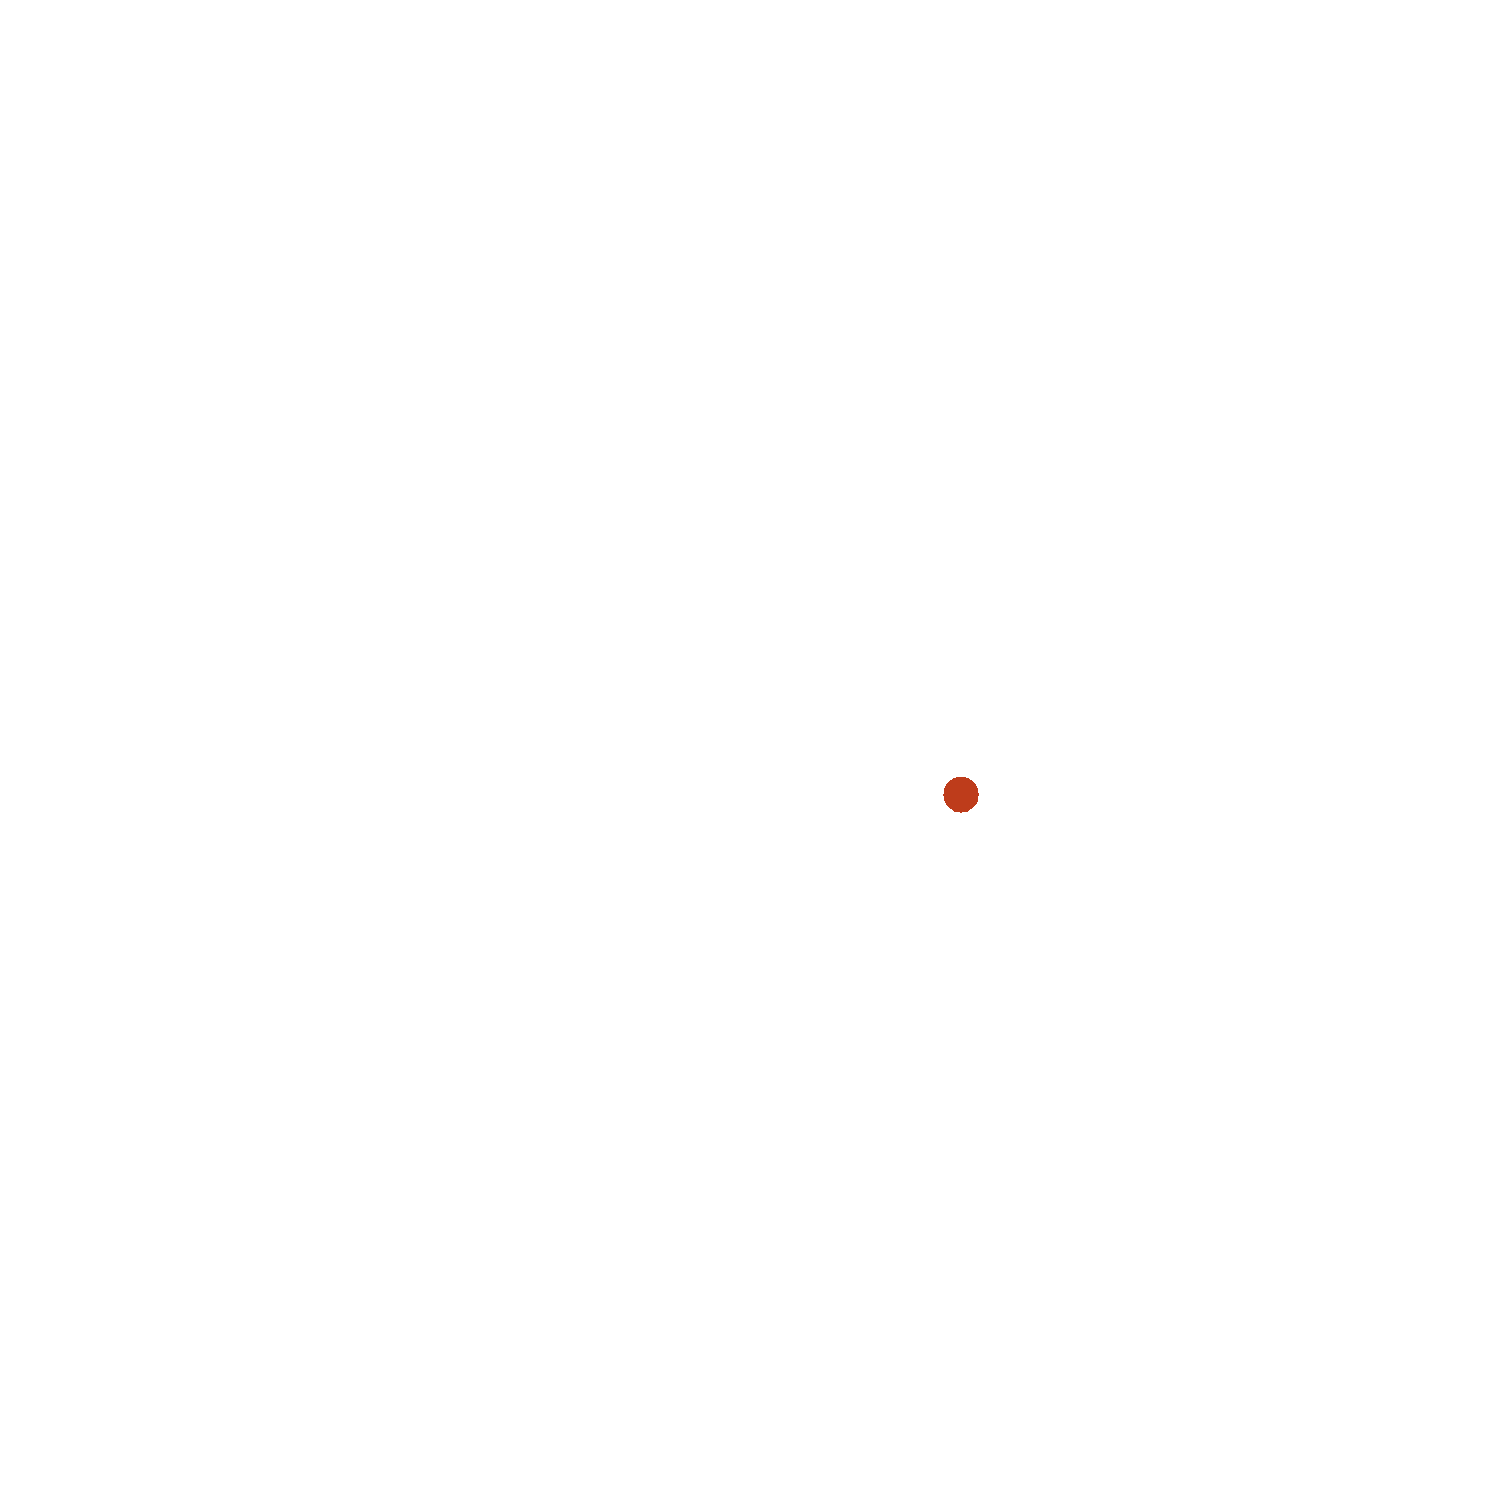

In [59]:
rev = cli.revision.get_revision(demo, 2)
print('ID', rev['id'])
print('Commentaire', rev['diagnostic'])
print('SVG', rev['svg'])

In [57]:
rev = cli.revision.get_revision(demo, 11, svg=False)
print('Commentaire:', rev['diagnostic'])
rev = cli.revision.get_revision(demo, 13, svg=False)
print('Commentaire:', rev['diagnostic'])

Commentaire: [onlyEnable=Microaneurysms,Hemorrhages,Sub-retinal hemorrhage,Pre-retinal hemorrhage,Neovascularization,Uncertain - Red,Others]
Commentaire: [diagnostic=0]Faire le diagnostic


Lire un biomarqueur

In [41]:
#b = cli.revision.get_biomarkers(demo, 2)[vessel]
b = cli.revision.get_biomarker(user_id=demo, image_id=2, biomarker='Hemorrhages')

(-0.5, 1499.5, 1499.5, -0.5)

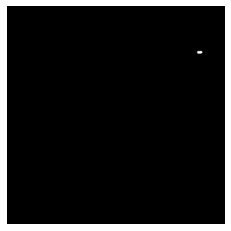

In [44]:
import matplotlib.pyplot as plt
plt.imshow(b,cmap='gray')
plt.axis('off')

Modifier une revision:

In [58]:
#cli.revision.update(svg, demo, 2, "diagnostic")
cli.revision.update_diagnostic("diagnostic", demo, 2)


Modifier un biomarqueur:

In [ ]:
# img = cv2.imread(...)
png = cli.utils.encode_svg(img)
cli.revision.update_biomarker(demo, 2, vessel, png)

Supprimer tout les biomarqueurs

In [65]:
#cli.revision.clear_revision(demo,2)

Transférer des biomarqueurs d'un clinicien à l'autre

In [66]:
cli.revision.transfer_biomarker(2, demo, prod, biomarker=vessel) # Uniquement les vaisseaux
cli.revision.transfer_biomarker([10,11], demo, prod)  # Tous les biomarqueurs pour les images 0 et 11